In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Deep Learning -ITS Policies Impact level in B5G slices

## Data importing and pre-processing

In [2]:
# Dados referentes a App S
df_s_fs = pd.read_csv(r"C:\Users\sarai\Documents\doutorado\artigos\producao\vtc2024\df_s_fs.csv")
df_s_fq = pd.read_csv(r"C:\Users\sarai\Documents\doutorado\artigos\producao\vtc2024\df_s_fq.csv")
df_s_fn = pd.read_csv(r"C:\Users\sarai\Documents\doutorado\artigos\producao\vtc2024\df_s_fn.csv")
df_s_fs['pdr'] = df_s_fs.rec_serv_s_fs / df_s_fs.env_car_s_fs
df_s_fq['pdr'] = df_s_fq.rec_serv_s_fq / df_s_fq.env_car_s_fq
df_s_fn['pdr'] = df_s_fn.rec_serv_s_fn / df_s_fn.env_car_s_fn
df_s_fs.rename(columns={"time1_size_s_fs": "time", "rec_serv_s_fs": "rec_serv", "env_car_s_fs": "env_car", "time2_delay_s_fs": "time2_delay", "delay_rtt_s_fs": "rtt", "ncars_s_fs": "ncars"}, inplace=True)
df_s_fq.rename(columns={"time1_size_s_fq": "time", "rec_serv_s_fq": "rec_serv", "env_car_s_fq": "env_car", "time2_delay_s_fq": "time2_delay", "delay_rtt_s_fq": "rtt", "ncars_s_fq": "ncars"}, inplace=True)
df_s_fn.rename(columns={"time1_size_s_fn": "time", "rec_serv_s_fn": "rec_serv", "env_car_s_fn": "env_car", "time2_delay_s_fn": "time2_delay", "delay_rtt_s_fn": "rtt", "ncars_s_fn": "ncars"}, inplace=True)
df_s_fs.drop(columns=['time2_delay'], inplace=True)
df_s_fq.drop(columns=['time2_delay'], inplace=True)
df_s_fn.drop(columns=['time2_delay'], inplace=True)
df_s_fs['app'] = 'S' # Safety
df_s_fq['app'] = 'S' # Safety
df_s_fn['app'] = 'S' # Safety
df_s_fs['cat_req'] = 'mbclcp' #medium bandwidth / critical latency / critical priority
df_s_fq['cat_req'] = 'mbclcp' #medium bandwidth / critical latency / critical priority
df_s_fn['cat_req'] = 'mbclcp' #medium bandwidth / critical latency / critical priority
df_s_fs['approach'] = 'FS'
df_s_fq['approach'] = 'FQ'
df_s_fn['approach'] = 'FN'
df_s = pd.concat([df_s_fs, df_s_fq, df_s_fn])

# Dados referentes a App E
df_e_fs = pd.read_csv(r"C:\Users\sarai\Documents\doutorado\artigos\producao\vtc2024\df_e_fs.csv")
df_e_fq = pd.read_csv(r"C:\Users\sarai\Documents\doutorado\artigos\producao\vtc2024\df_e_fq.csv")
df_e_fn = pd.read_csv(r"C:\Users\sarai\Documents\doutorado\artigos\producao\vtc2024\df_e_fn.csv")
df_e_fs['pdr'] = df_e_fs.rec_serv_e_fs / df_e_fs.env_car_e_fs
df_e_fq['pdr'] = df_e_fq.rec_serv_e_fq / df_e_fq.env_car_e_fq
df_e_fn['pdr'] = df_e_fn.rec_serv_e_fn / df_e_fn.env_car_e_fn
df_e_fs.rename(columns={"time1_size_e_fs": "time", "rec_serv_e_fs": "rec_serv", "env_car_e_fs": "env_car", "time2_delay_e_fs": "time2_delay", "delay_rtt_e_fs": "rtt", "ncars_e_fs": "ncars"}, inplace=True)
df_e_fq.rename(columns={"time1_size_e_fq": "time", "rec_serv_e_fq": "rec_serv", "env_car_e_fq": "env_car", "time2_delay_e_fq": "time2_delay", "delay_rtt_e_fq": "rtt", "ncars_e_fq": "ncars"}, inplace=True)
df_e_fn.rename(columns={"time1_size_e_fn": "time", "rec_serv_e_fn": "rec_serv", "env_car_e_fn": "env_car", "time2_delay_e_fn": "time2_delay", "delay_rtt_e_fn": "rtt", "ncars_e_fn": "ncars"}, inplace=True)
df_e_fs.drop(columns=['time2_delay'], inplace=True)
df_e_fq.drop(columns=['time2_delay'], inplace=True)
df_e_fn.drop(columns=['time2_delay'], inplace=True)
df_e_fs['app'] = 'E' # Efficiency
df_e_fq['app'] = 'E' # Efficiency
df_e_fn['app'] = 'E' # Efficiency
df_e_fs['cat_req'] = 'mbmlhp' #medium bandwidth / medium latency / high priority
df_e_fq['cat_req'] = 'mbmlhp' #medium bandwidth / medium latency / high priority
df_e_fn['cat_req'] = 'mbmlhp' #medium bandwidth / medium latency / high priority
df_e_fs['approach'] = 'FS'
df_e_fq['approach'] = 'FQ'
df_e_fn['approach'] = 'FN'
df_e = pd.concat([df_e_fs, df_e_fq, df_e_fn])

# Dados referentes a App E2
df_e2_fs = pd.read_csv(r"C:\Users\sarai\Documents\doutorado\artigos\producao\vtc2024\df_e2_fs.csv")
df_e2_fq = pd.read_csv(r"C:\Users\sarai\Documents\doutorado\artigos\producao\vtc2024\df_e2_fq.csv")
df_e2_fn = pd.read_csv(r"C:\Users\sarai\Documents\doutorado\artigos\producao\vtc2024\df_e2_fn.csv")
df_e2_fs['pdr'] = df_e2_fs.rec_serv_e2_fs / df_e2_fs.env_car_e2_fs
df_e2_fq['pdr'] = df_e2_fq.rec_serv_e2_fq / df_e2_fq.env_car_e2_fq
df_e2_fn['pdr'] = df_e2_fn.rec_serv_e2_fn / df_e2_fn.env_car_e2_fn
df_e2_fs.rename(columns={"time1_size_e2_fs": "time", "rec_serv_e2_fs": "rec_serv", "env_car_e2_fs": "env_car", "time2_delay_e2_fs": "time2_delay", "delay_rtt_e2_fs": "rtt", "ncars_e2_fs": "ncars"}, inplace=True)
df_e2_fq.rename(columns={"time1_size_e2_fq": "time", "rec_serv_e2_fq": "rec_serv", "env_car_e2_fq": "env_car", "time2_delay_e2_fq": "time2_delay", "delay_rtt_e2_fq": "rtt", "ncars_e2_fq": "ncars"}, inplace=True)
df_e2_fn.rename(columns={"time1_size_e2_fn": "time", "rec_serv_e2_fn": "rec_serv", "env_car_e2_fn": "env_car", "time2_delay_e2_fn": "time2_delay", "delay_rtt_e2_fn": "rtt", "ncars_e2_fn": "ncars"}, inplace=True)
df_e2_fs.drop(columns=['time2_delay'], inplace=True)
df_e2_fq.drop(columns=['time2_delay'], inplace=True)
df_e2_fn.drop(columns=['time2_delay'], inplace=True)
df_e2_fs['app'] = 'E2'
df_e2_fq['app'] = 'E2'
df_e2_fn['app'] = 'E2'
df_e2_fs['cat_req'] = 'hbmlmp' #high bandwidth / medium latency / medium priority
df_e2_fq['cat_req'] = 'hbmlmp' #high bandwidth / medium latency / medium priority
df_e2_fn['cat_req'] = 'hbmlmp' #high bandwidth / medium latency / medium priority
df_e2_fs['approach'] = 'FS'
df_e2_fq['approach'] = 'FQ'
df_e2_fn['approach'] = 'FN'
df_e2 = pd.concat([df_e2_fs, df_e2_fq, df_e2_fn])

# Dados referentes a App G
df_g_fs = pd.read_csv(r"C:\Users\sarai\Documents\doutorado\artigos\producao\vtc2024\df_g_fs.csv")
df_g_fq = pd.read_csv(r"C:\Users\sarai\Documents\doutorado\artigos\producao\vtc2024\df_g_fq.csv")
df_g_fn = pd.read_csv(r"C:\Users\sarai\Documents\doutorado\artigos\producao\vtc2024\df_g_fn.csv")
df_g_fs['pdr'] = df_g_fs.rec_serv_g_fs / df_g_fs.env_car_g_fs
df_g_fq['pdr'] = df_g_fq.rec_serv_g_fq / df_g_fq.env_car_g_fq
df_g_fn['pdr'] = df_g_fn.rec_serv_g_fn / df_g_fn.env_car_g_fn
df_g_fs.rename(columns={"time1_size_g_fs": "time", "rec_serv_g_fs": "rec_serv", "env_car_g_fs": "env_car", "time2_delay_g_fs": "time2_delay", "delay_rtt_g_fs": "rtt", "ncars_g_fs": "ncars"}, inplace=True)
df_g_fq.rename(columns={"time1_size_g_fq": "time", "rec_serv_g_fq": "rec_serv", "env_car_g_fq": "env_car", "time2_delay_g_fq": "time2_delay", "delay_rtt_g_fq": "rtt", "ncars_g_fq": "ncars"}, inplace=True)
df_g_fn.rename(columns={"time1_size_g_fn": "time", "rec_serv_g_fn": "rec_serv", "env_car_g_fn": "env_car", "time2_delay_g_fn": "time2_delay", "delay_rtt_g_fn": "rtt", "ncars_g_fn": "ncars"}, inplace=True)
df_g_fs.drop(columns=['time2_delay'], inplace=True)
df_g_fq.drop(columns=['time2_delay'], inplace=True)
df_g_fn.drop(columns=['time2_delay'], inplace=True)
df_g_fs['app'] = 'G'
df_g_fq['app'] = 'G'
df_g_fn['app'] = 'G'
df_g_fs['cat_req'] = 'lblllp' #low bandwidth / low latency / low priority
df_g_fq['cat_req'] = 'lblllp' #low bandwidth / low latency / low priority
df_g_fn['cat_req'] = 'lblllp' #low bandwidth / low latency / low priority
df_g_fs['approach'] = 'FS'
df_g_fq['approach'] = 'FQ'
df_g_fn['approach'] = 'FN'
df_g = pd.concat([df_g_fs, df_g_fq, df_g_fn])
df_g.dropna(inplace=True) # elimina registros nulos

## Feature Engineering

In [3]:
############### Engenharia de features ########################################

# Aplica Box-Cox no RTT, assegurando que todos os valores de RTT sejam positivos
df_e['bc_rtt'], fitted_lambda_e = boxcox(df_e['rtt'] + 1)  # Adicionando 1 para evitar o log de zero
df_e2['bc_rtt'], fitted_lambda_e2 = boxcox(df_e2['rtt'] + 1)
df_g['bc_rtt'], fitted_lambda_g = boxcox(df_g['rtt'] + 1)
df_s['bc_rtt'], fitted_lambda_s = boxcox(df_s['rtt'] + 1)

# Taxa de mudança para RTT
df_e['rtt_change'] = df_e['rtt'].diff() / df_e['time'].diff()
df_e2['rtt_change'] = df_e2['rtt'].diff() / df_e2['time'].diff()
df_g['rtt_change'] = df_g['rtt'].diff() / df_g['time'].diff()
df_s['rtt_change'] = df_s['rtt'].diff() / df_s['time'].diff()
# Taxa de mudança para PDR
df_e['pdr_change'] = df_e['pdr'].diff() / df_e['time'].diff()
df_e2['pdr_change'] = df_e2['pdr'].diff() / df_e2['time'].diff()
df_g['pdr_change'] = df_g['pdr'].diff() / df_g['time'].diff()
df_s['pdr_change'] = df_s['pdr'].diff() / df_s['time'].diff()

# Agregações temporais: Média móvel de 3 períodos para RTT
df_e['rtt_mam'] = df_e['rtt'].rolling(window=3).mean()
df_e2['rtt_mam'] = df_e2['rtt'].rolling(window=3).mean()
df_g['rtt_mam'] = df_g['rtt'].rolling(window=3).mean()
df_s['rtt_mam'] = df_s['rtt'].rolling(window=3).mean()
# Agregações temporais: Média móvel de 3 períodos para PDR
df_e['pdr_mam'] = df_e['pdr'].rolling(window=3).mean()
df_e2['pdr_mam'] = df_e2['pdr'].rolling(window=3).mean()
df_g['pdr_mam'] = df_g['pdr'].rolling(window=3).mean()
df_s['pdr_mam'] = df_s['pdr'].rolling(window=3).mean()

# Agregações temporais: Desvio padrao de 3 períodos para RTT
df_e['rtt_masd'] = df_e['rtt'].rolling(window=3).std()
df_e2['rtt_masd'] = df_e2['rtt'].rolling(window=3).std()
df_g['rtt_masd'] = df_g['rtt'].rolling(window=3).std()
df_s['rtt_masd'] = df_s['rtt'].rolling(window=3).std()
# Agregações temporais: Desvio padrao de 3 períodos para PDR
df_e['rtt_masd'] = df_e['pdr'].rolling(window=3).std()
df_e2['rtt_masd'] = df_e2['pdr'].rolling(window=3).std()
df_g['rtt_masd'] = df_g['pdr'].rolling(window=3).std()
df_s['rtt_masd'] = df_s['pdr'].rolling(window=3).std()

# Transformações logarítmicas para o RTT (natural)
df_e['log_rtt'] = np.log(df_e['rtt'])
df_e2['log_rtt'] = np.log(df_e2['rtt'])
df_g['log_rtt'] = np.log(df_g['rtt'])
df_s['log_rtt'] = np.log(df_s['rtt'])
# Transformações logarítmicas para o PDR (natural)
df_e['log_pdr'] = np.log(df_e['pdr'])
df_e2['log_pdr'] = np.log(df_e2['pdr'])
df_g['log_pdr'] = np.log(df_g['pdr'])
df_s['log_pdr'] = np.log(df_s['pdr'])

# Transformações logarítmicas para o RTT (base2)
df_e['log2_rtt'] = np.log2(df_e['rtt'])
df_e2['log2_rtt'] = np.log2(df_e2['rtt'])
df_g['log2_rtt'] = np.log2(df_g['rtt'])
df_s['log2_rtt'] = np.log2(df_s['rtt'])
# Transformações logarítmicas para o PDR (base2)
df_e['log2_pdr'] = np.log2(df_e['pdr'])
df_e2['log2_pdr'] = np.log2(df_e2['pdr'])
df_g['log2_pdr'] = np.log2(df_g['pdr'])
df_s['log2_pdr'] = np.log2(df_s['pdr'])

# Transformações polinomiais para o RTT (elevando ao quadrado)
df_e['rtt_sqrd'] = df_e['rtt'] ** 2
df_e2['rtt_sqrd'] = df_e2['rtt'] ** 2
df_g['rtt_sqrd'] = df_g['rtt'] ** 2
df_s['rtt_sqrd'] = df_s['rtt'] ** 2
# Transformações polinomiais para o PDR (elevando ao quadrado)
df_e['pdr_sqrd'] = df_e['pdr'] ** 2
df_e2['pdr_sqrd'] = df_e2['pdr'] ** 2
df_g['pdr_sqrd'] = df_g['pdr'] ** 2
df_s['pdr_sqrd'] = df_s['pdr'] ** 2

# unindo todo o dataset, considerando todas aplicaçoes e abordagens avaliadas em simulacao - excluindo nulos
df_sim = pd.concat([df_e, df_e2, df_s, df_g])
df_sim.dropna(inplace=True)
#Removendo coluna de tempo
#df_sim.drop(columns=['time'], inplace=True)

# Campo para nivel de impacto
df_sim['impact_level'] = 'undefined'

# RTT utilizado de referencia
rtt = 'bc_rtt'

print('fitted_lambda_e={}, fitted_lambda_e2={}, fitted_lambda_g={}, fitted_lambda_s={}'.format(fitted_lambda_e, fitted_lambda_e2, fitted_lambda_g, fitted_lambda_s))

fitted_lambda_e=0.48709405623488683, fitted_lambda_e2=0.408284211004519, fitted_lambda_g=0.2521412794903588, fitted_lambda_s=-0.42895625317649855


In [4]:
#sample dos dados
df_sim.sample(5)

time       rec_serv        env_car         rtt  ncars       pdr app  \
364   365  258055.466667  498534.400000  724.600000     15  0.517628   G   
246   247  250574.545455  494612.363636  826.545455     11  0.506608   G   
436   437  372302.933333  496137.600000   53.782000     15  0.750403   S   
106   107  618374.400000  989878.400000  762.200000      5  0.624697  E2   
304   305  478270.545455  496791.272727    4.149818     11  0.962719   S   

    cat_req approach     bc_rtt  ...      rtt_mam   pdr_mam  rtt_masd  \
364  lblllp       FN  16.910384  ...   594.577778  0.515016  0.025102   
246  lblllp       FN  17.613988  ...   897.909091  0.477183  0.031793   
436  mbclcp       FQ   1.912651  ...    61.984889  0.765534  0.015024   
106  hbmlmp       FQ  34.361347  ...  1774.400000  0.628429  0.007267   
304  mbclcp       FQ   1.177098  ...     3.140939  0.982453  0.017403   

      log_rtt   log_pdr  log2_rtt  log2_pdr       rtt_sqrd  pdr_sqrd  \
364  6.585620 -0.658498  9.501041 -0.950012  525045.160000  0.267939   
246  6.717255 -0.680018  9.690950 -0.981058  683177.388430  0.256652   
436  3.984939 -0.287145  5.749052 -0.414263    2892.503524  0.563104   
106  6.636209 -0.470488  9.574026 -0.678771  580948.840000  0.390247   
304  1.423065 -0.037993  2.053048 -0.054813      17.220991  0.926828   

     impact_level  
364     undefined  
246     undefined  
436     undefined  
106     undefined  
304     undefined  

[5 rows x 22 columns]

In [5]:
# distribuição dos dados no dataframe
df_sim.describe(include="all")

time      rec_serv       env_car           rtt        ncars  \
count   5093.000000  5.093000e+03  5.093000e+03   5093.000000  5093.000000   
unique          NaN           NaN           NaN           NaN          NaN   
top             NaN           NaN           NaN           NaN          NaN   
freq            NaN           NaN           NaN           NaN          NaN   
mean     217.034950  4.040460e+05  6.255493e+05   1746.482510     9.429217   
std      127.713621  2.036095e+05  2.160867e+05   2864.169374     4.127812   
min        1.000000  3.295600e+04  4.341895e+05      0.060600     1.000000   
25%      107.000000  2.660448e+05  4.953387e+05      8.096667     5.000000   
50%      213.000000  4.270662e+05  4.967913e+05    829.363636    11.000000   
75%      323.000000  4.985344e+05  9.794923e+05   2125.800000    11.000000   
max      450.000000  1.224765e+06  1.018640e+06  38180.200000    16.000000   

                pdr   app cat_req approach       bc_rtt  ...       rtt_mam  \
count   5093.000000  5093    5093     5093  5093.000000  ...   5093.000000   
unique          NaN     4       4        3          NaN  ...           NaN   
top             NaN     E  mbmlhp       FN          NaN  ...           NaN   
freq            NaN  1348    1348     1800          NaN  ...           NaN   
mean       0.649091   NaN     NaN      NaN    35.441836  ...   1745.843867   
std        0.271573   NaN     NaN      NaN    36.002048  ...   2570.471153   
min        0.066869   NaN     NaN      NaN     0.058099  ...      0.180133   
25%        0.502021   NaN     NaN      NaN     1.642420  ...      8.646333   
50%        0.623188   NaN     NaN      NaN    28.503553  ...    897.818182   
75%        0.903297   NaN     NaN      NaN    52.143920  ...   2240.987222   
max        1.624390   NaN     NaN      NaN   156.823544  ...  20608.000000   

            pdr_mam     rtt_masd      log_rtt      log_pdr     log2_rtt  \
count   5093.000000  5093.000000  5093.000000  5093.000000  5093.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.649448     0.029094     5.353900    -0.570755     7.724045   
std        0.268313     0.043951     3.080603     0.612719     4.444370   
min        0.067672     0.000000    -2.803460    -2.705015    -4.044538   
25%        0.504004     0.005388     2.091452    -0.689113     3.017328   
50%        0.626388     0.013182     6.720659    -0.472906     9.695861   
75%        0.900517     0.035856     7.661903    -0.101704    11.053790   
max        1.412720     0.517749    10.550072     0.485133    15.220537   

           log2_pdr      rtt_sqrd     pdr_sqrd  impact_level  
count   5093.000000  5.093000e+03  5093.000000          5093  
unique          NaN           NaN          NaN             1  
top             NaN           NaN          NaN     undefined  
freq            NaN           NaN          NaN          5093  
mean      -0.823425  1.125206e+07     0.495056           NaN  
std        0.883966  5.282345e+07     0.344146           NaN  
min       -3.902512  3.672360e-03     0.004472           NaN  
25%       -0.994180  6.555601e+01     0.252025           NaN  
50%       -0.682260  6.878440e+05     0.388364           NaN  
75%       -0.146728  4.519026e+06     0.815945           NaN  
max        0.699898  1.457728e+09     2.638644           NaN  

[11 rows x 22 columns]

## Dealing with categorical values

In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# tratando colunas categoricas
colunas_categoricas = ['app', 'approach', 'cat_req']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')

df_sim_ohe = one_hot_enc.fit_transform(df_sim)
df_sim_ohe = pd.DataFrame(df_sim_ohe, columns=one_hot_enc.get_feature_names_out())
df_sim_ohe.columns = [col.replace('remainder__', '') for col in df_sim_ohe.columns]
df_sim_ohe.columns = [col.replace('onehotencoder__', 'ohe__') for col in df_sim_ohe.columns]
df_sim_ohe.head()

ohe__app_E ohe__app_E2 ohe__app_G ohe__app_S ohe__approach_FN  \
0        1.0         0.0        0.0        0.0              0.0   
1        1.0         0.0        0.0        0.0              0.0   
2        1.0         0.0        0.0        0.0              0.0   
3        1.0         0.0        0.0        0.0              0.0   
4        1.0         0.0        0.0        0.0              0.0   

  ohe__approach_FQ ohe__approach_FS ohe__cat_req_hbmlmp ohe__cat_req_lblllp  \
0              0.0              1.0                 0.0                 0.0   
1              0.0              1.0                 0.0                 0.0   
2              0.0              1.0                 0.0                 0.0   
3              0.0              1.0                 0.0                 0.0   
4              0.0              1.0                 0.0                 0.0   

  ohe__cat_req_mbclcp  ...   rtt_mam   pdr_mam  rtt_masd   log_rtt   log_pdr  \
0                 0.0  ...  2.807333  1.016067  0.036434   0.34359  0.024098   
1                 0.0  ...  0.748333  0.992257  0.027828 -0.592397 -0.024098   
2                 0.0  ...  0.790667  1.008324  0.027828  -0.89404  0.024098   
3                 0.0  ...     0.416  0.992257  0.027828 -1.251763 -0.024098   
4                 0.0  ...  0.791667  1.008324  0.027828  0.518794  0.024098   

   log2_rtt  log2_pdr  rtt_sqrd  pdr_sqrd impact_level  
0  0.495695  0.034765    1.9881  1.049375    undefined  
1 -0.854649 -0.034765  0.305809  0.952948    undefined  
2 -1.289827  0.034765  0.167281  1.049375    undefined  
3 -1.805913 -0.034765  0.081796  0.952948    undefined  
4  0.748461  0.034765    2.8224  1.049375    undefined  

[5 rows x 30 columns]

In [7]:
# Formato final do dataframe
df_sim_ohe.shape

(5093, 30)

In [8]:
# Identificando colunas
df_sim_ohe.columns

Index(['ohe__app_E', 'ohe__app_E2', 'ohe__app_G', 'ohe__app_S',
       'ohe__approach_FN', 'ohe__approach_FQ', 'ohe__approach_FS',
       'ohe__cat_req_hbmlmp', 'ohe__cat_req_lblllp', 'ohe__cat_req_mbclcp',
       'ohe__cat_req_mbmlhp', 'time', 'rec_serv', 'env_car', 'rtt', 'ncars',
       'pdr', 'bc_rtt', 'rtt_change', 'pdr_change', 'rtt_mam', 'pdr_mam',
       'rtt_masd', 'log_rtt', 'log_pdr', 'log2_rtt', 'log2_pdr', 'rtt_sqrd',
       'pdr_sqrd', 'impact_level'],
      dtype='object')

## Applications analisys and impact level attribution

### App E (Efficiency 500Kbps - Priority 1)

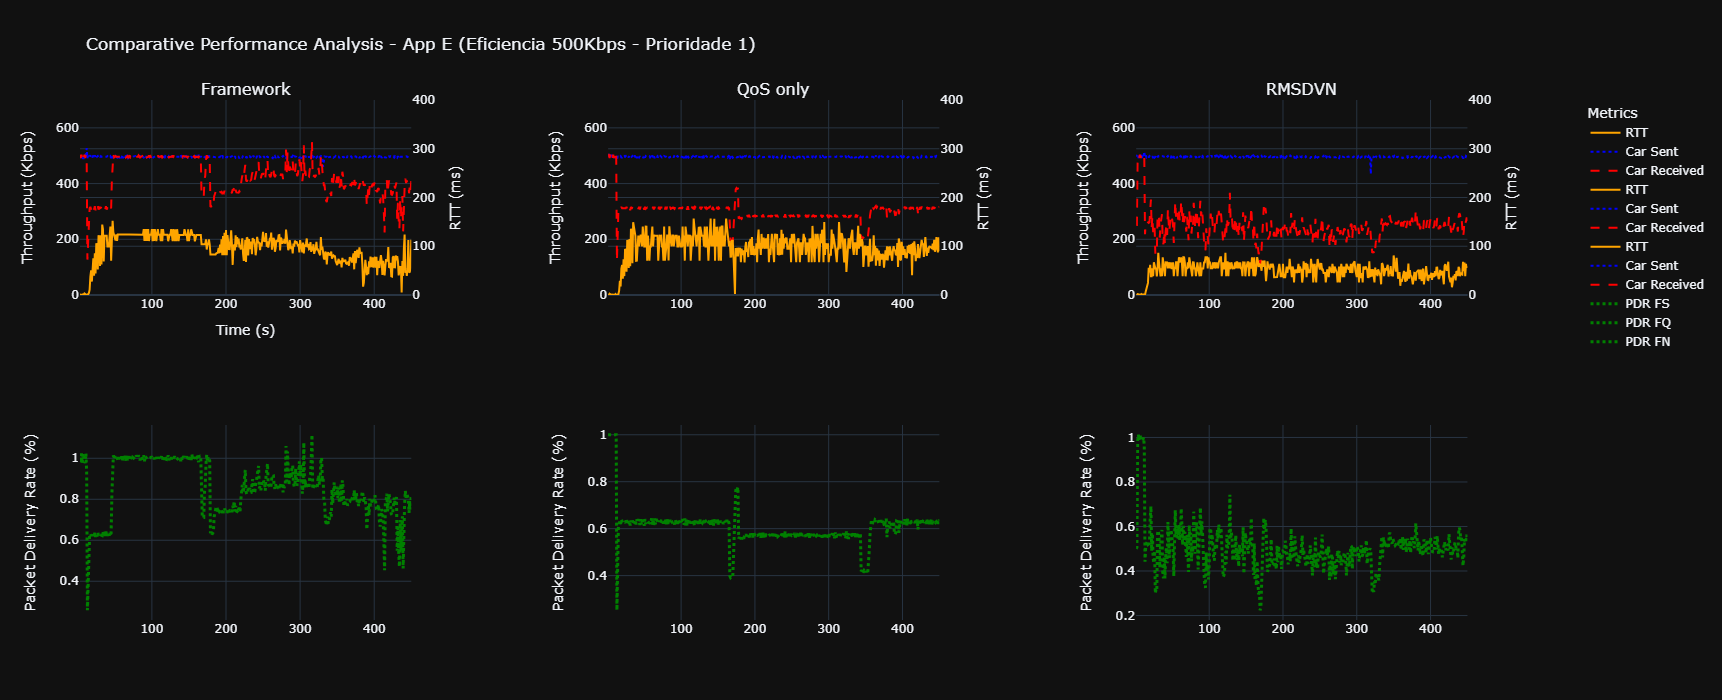

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando figura com subplots - App E (Eficiencia 500Kbps - Prioridade 1)
fig = make_subplots(rows=2, cols=3, subplot_titles=('Framework', 'QoS only', 'RMSDVN'),
                    specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}], [{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

# Filtrando App E
dfse = df_sim_ohe.query('`ohe__app_E` == 1 and `ohe__approach_FS` == 1')
dfqe = df_sim_ohe.query('`ohe__app_E` == 1 and `ohe__approach_FQ` == 1')
dfne = df_sim_ohe.query('`ohe__app_E` == 1 and `ohe__approach_FN` == 1')

# Adicionando dados aos subplots
fig.add_trace(go.Scatter(x=dfse['time'], y=dfse[rtt], mode='lines', name='RTT', line=dict(color='orange', width=2)), row=1, col=1, secondary_y=True)
fig.add_trace(go.Scatter(x=dfse['time'], y=dfse['env_car']/1000, mode='lines', name='Car Sent', line=dict(color='blue', dash='dot')), row=1, col=1, secondary_y=False)
fig.add_trace(go.Scatter(x=dfse['time'], y=dfse['rec_serv']/1000, mode='lines', name='Car Received', line=dict(color='red', dash='dash')), row=1, col=1, secondary_y=False)

fig.add_trace(go.Scatter(x=dfqe['time'], y=dfqe[rtt], mode='lines', name='RTT', line=dict(color='orange', width=2)), row=1, col=2, secondary_y=True)
fig.add_trace(go.Scatter(x=dfqe['time'], y=dfqe['env_car']/1000, mode='lines', name='Car Sent', line=dict(color='blue', dash='dot')), row=1, col=2, secondary_y=False)
fig.add_trace(go.Scatter(x=dfqe['time'], y=dfqe['rec_serv']/1000, mode='lines', name='Car Received', line=dict(color='red', dash='dash')), row=1, col=2, secondary_y=False)

fig.add_trace(go.Scatter(x=dfne['time'], y=dfne[rtt], mode='lines', name='RTT', line=dict(color='orange', width=2)), row=1, col=3, secondary_y=True)
fig.add_trace(go.Scatter(x=dfne['time'], y=dfne['env_car']/1000, mode='lines', name='Car Sent', line=dict(color='blue', dash='dot')), row=1, col=3, secondary_y=False)
fig.add_trace(go.Scatter(x=dfne['time'], y=dfne['rec_serv']/1000, mode='lines', name='Car Received', line=dict(color='red', dash='dash')), row=1, col=3, secondary_y=False)

fig.add_trace(go.Scatter(x=dfse['time'], y=dfse['pdr'], mode='lines', name='PDR FS', line=dict(color='green', dash='dot', width=3)), row=2, col=1, secondary_y=False)
fig.add_trace(go.Scatter(x=dfqe['time'], y=dfqe['pdr'], mode='lines', name='PDR FQ', line=dict(color='green', dash='dot', width=3)), row=2, col=2, secondary_y=False)
fig.add_trace(go.Scatter(x=dfne['time'], y=dfne['pdr'], mode='lines', name='PDR FN', line=dict(color='green', dash='dot', width=3)), row=2, col=3, secondary_y=False)

# Atualizando layout para um design coerente
fig.update_layout(
    title='Comparative Performance Analysis - App E (Eficiencia 500Kbps - Prioridade 1)',
    xaxis_title='Time (s)',
    legend_title='Metrics',
    template='plotly_dark',
    height=700,  # Ajustar a altura se necessário
    #width=3700   # Ajustar a largura para caber os três plots
)

# Atualizando configurações dos eixos y
for i in range(1, 4):
    fig.update_yaxes(title_text="Throughput (Kbps)", range=[0, 700], row=1, col=i, secondary_y=False)
    fig.update_yaxes(title_text="Packet Delivery Rate (%)", row=2, col=i, secondary_y=False)
    fig.update_yaxes(title_text="RTT (ms)", range=[0, 400], row=1, col=i, secondary_y=True)  # Ajuste do range do eixo Y secundário

# Mostrando gráfico
fig.show()

#### Define requirements, classify and analisys - App E (Efficiency 500Kbps - Priority 1)

In [10]:
# Requisitos de impacto App E (Eficiencia 500Kbps - Prioridade 1)
low = ['<=200', '>=80', '>350']
medium = ['<=250', '>=50', '>=200']
high = ['>250', '<50', '<200']
#impact_level = ['low', 'medium', 'high']
imp_e = {'low': low, 'medium':medium, 'high':high}
imp_e = pd.DataFrame.from_dict(imp_e)
imp_e.index = ['RTT (ms)', 'PDR (%)', 'Rx (Kbps)']
print('\nRequisitos de impacto App E (Eficiencia 500Kbps - Prioridade 1)\n')
imp_e = pd.DataFrame.from_dict(imp_e)
display(imp_e)

# classificando App E
df_sim_ohe.loc[(df_sim_ohe['ohe__app_E'] == 1) & (df_sim_ohe[rtt] <= 200) & (df_sim_ohe['pdr'] >= 0.80) & (df_sim_ohe['rec_serv'] > 350000),'impact_level'] = 'low'
df_sim_ohe.loc[(df_sim_ohe['ohe__app_E'] == 1) & (df_sim_ohe[rtt] <= 250) & (df_sim_ohe['pdr'] >= 0.50) & (df_sim_ohe['rec_serv'] >= 200000) & (df_sim_ohe['impact_level'] != 'low'), 'impact_level'] = 'medium'
df_sim_ohe.loc[(df_sim_ohe['ohe__app_E'] == 1) & ((df_sim_ohe[rtt] > 250) | (df_sim_ohe['pdr'] < 0.50) | (df_sim_ohe['rec_serv'] < 200000)) & (df_sim_ohe['impact_level'] != 'medium'), 'impact_level'] = 'high'

# App E - analise impacto
imp_e_fs = pd.DataFrame(df_sim_ohe.query('`ohe__app_E` == 1 and `ohe__approach_FS` == 1').groupby(['impact_level']).count()['ohe__approach_FS'])
imp_e_fq = pd.DataFrame(df_sim_ohe.query('`ohe__app_E` == 1 and `ohe__approach_FQ` == 1').groupby(['impact_level']).count()['ohe__approach_FQ'])
imp_e_fn = pd.DataFrame(df_sim_ohe.query('`ohe__app_E` == 1 and `ohe__approach_FN` == 1').groupby(['impact_level']).count()['ohe__approach_FN'])
analise_e = imp_e_fs.join(imp_e_fq).join(imp_e_fn)
analise_e.columns = ['FS', 'FQ', 'FN']
print('\nAnalise de impacto App E (Eficiencia 500Kbps - Prioridade 1)\n')
display(analise_e.T.style.background_gradient())


Requisitos de impacto App E (Eficiencia 500Kbps - Prioridade 1)



low medium  high
RTT (ms)   <=200  <=250  >250
PDR (%)     >=80   >=50   <50
Rx (Kbps)   >350  >=200  <200


Analise de impacto App E (Eficiencia 500Kbps - Prioridade 1)



In [11]:
# Requisitos de impacto App G (Internet Generica - 500Kbps - Prioridade 3)
low = ['<=50', '>=50', '>250']
medium = ['<=100', '>=35', '>=100']
high = ['>100', '<35', '<100']
imp_g = {'low': low, 'medium':medium, 'high':high}
imp_g = pd.DataFrame.from_dict(imp_g)
imp_g.index = ['RTT (ms)', 'PDR (%)', 'Rx (Kbps)']
print('\nRequisitos de impacto App G (Internet Generica - 500Kbps - Prioridade 3)\n')
imp_g = pd.DataFrame.from_dict(imp_g)
display(imp_g)

# Classificando G
df_sim_ohe.loc[(df_sim_ohe['ohe__app_G'] == 1) & (df_sim_ohe[rtt] <= 50) & (df_sim_ohe['pdr'] >= 0.50) & (df_sim_ohe['rec_serv'] >= 250000),'impact_level'] = 'low'
df_sim_ohe.loc[(df_sim_ohe['ohe__app_G'] == 1) & (df_sim_ohe[rtt] <= 100) & (df_sim_ohe['pdr'] >= 0.35) & (df_sim_ohe['rec_serv'] >= 100000) & (df_sim_ohe['impact_level'] != 'low'), 'impact_level'] = 'medium'
df_sim_ohe.loc[(df_sim_ohe['ohe__app_G'] == 1) & ((df_sim_ohe[rtt] > 100) | (df_sim_ohe['pdr'] < 0.35) | (df_sim_ohe['rec_serv'] < 100000)) & (df_sim_ohe['impact_level'] != 'medium'), 'impact_level'] = 'high'

# App G - analise impacto
imp_g_fs = pd.DataFrame(df_sim_ohe.query('`ohe__app_G` == 1 and `ohe__approach_FS` == 1').groupby(['impact_level']).count()['ohe__approach_FS'])
imp_g_fq = pd.DataFrame(df_sim_ohe.query('`ohe__app_G` == 1 and `ohe__approach_FQ` == 1').groupby(['impact_level']).count()['ohe__approach_FQ'])
imp_g_fn = pd.DataFrame(df_sim_ohe.query('`ohe__app_G` == 1 and `ohe__approach_FN` == 1').groupby(['impact_level']).count()['ohe__approach_FN'])
analise_g = imp_g_fs.join(imp_g_fq).join(imp_g_fn)
analise_g.columns = ['FS', 'FQ', 'FN']
print('\nAnalise de impacto App G (Internet Generica - 500Kbps - Prioridade 3)\n')
display(analise_g.T.style.background_gradient())


Requisitos de impacto App G (Internet Generica - 500Kbps - Prioridade 3)



low medium  high
RTT (ms)   <=50  <=100  >100
PDR (%)    >=50   >=35   <35
Rx (Kbps)  >250  >=100  <100


Analise de impacto App G (Internet Generica - 500Kbps - Prioridade 3)



### App E2 (Entretenimento 1Mbps - Prioridade 2)

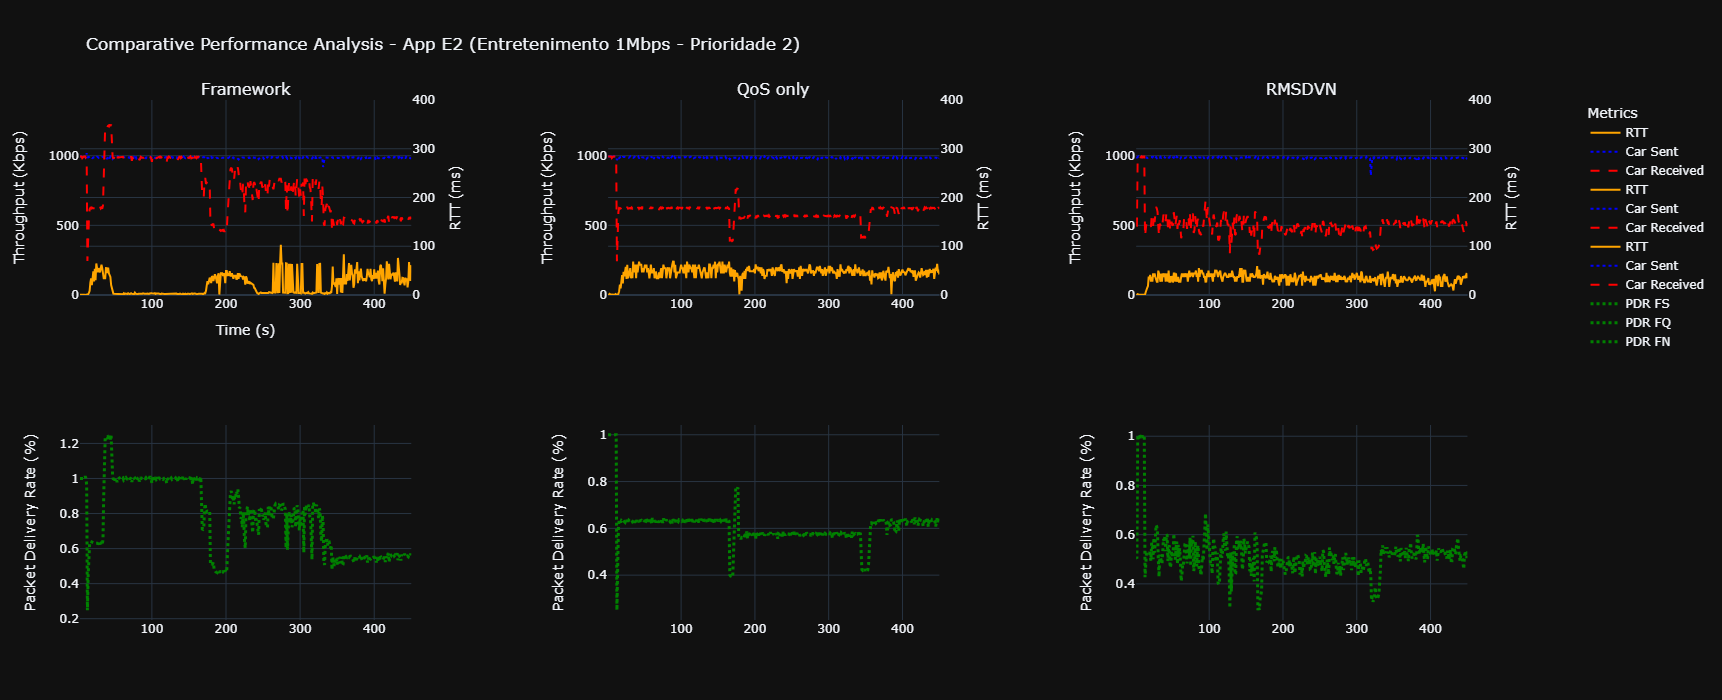

In [12]:
# Criando figura com subplots - App E2 (Entretenimento 1Mbps - Prioridade 2)
fig = make_subplots(rows=2, cols=3, subplot_titles=('Framework', 'QoS only', 'RMSDVN'),
                    specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}], [{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

# Filtrando App E2
dfse2 = df_sim_ohe.query('`ohe__app_E2` == 1 and `ohe__approach_FS` == 1')
dfqe2 = df_sim_ohe.query('`ohe__app_E2` == 1 and `ohe__approach_FQ` == 1')
dfne2 = df_sim_ohe.query('`ohe__app_E2` == 1 and `ohe__approach_FN` == 1')

# Adicionando dados aos subplots
fig.add_trace(go.Scatter(x=dfse2['time'], y=dfse2[rtt], mode='lines', name='RTT', line=dict(color='orange', width=2)), row=1, col=1, secondary_y=True)
fig.add_trace(go.Scatter(x=dfse2['time'], y=dfse2['env_car']/1000, mode='lines', name='Car Sent', line=dict(color='blue', dash='dot')), row=1, col=1, secondary_y=False)
fig.add_trace(go.Scatter(x=dfse2['time'], y=dfse2['rec_serv']/1000, mode='lines', name='Car Received', line=dict(color='red', dash='dash')), row=1, col=1, secondary_y=False)

fig.add_trace(go.Scatter(x=dfqe2['time'], y=dfqe2[rtt], mode='lines', name='RTT', line=dict(color='orange', width=2)), row=1, col=2, secondary_y=True)
fig.add_trace(go.Scatter(x=dfqe2['time'], y=dfqe2['env_car']/1000, mode='lines', name='Car Sent', line=dict(color='blue', dash='dot')), row=1, col=2, secondary_y=False)
fig.add_trace(go.Scatter(x=dfqe2['time'], y=dfqe2['rec_serv']/1000, mode='lines', name='Car Received', line=dict(color='red', dash='dash')), row=1, col=2, secondary_y=False)

fig.add_trace(go.Scatter(x=dfne2['time'], y=dfne2[rtt], mode='lines', name='RTT', line=dict(color='orange', width=2)), row=1, col=3, secondary_y=True)
fig.add_trace(go.Scatter(x=dfne2['time'], y=dfne2['env_car']/1000, mode='lines', name='Car Sent', line=dict(color='blue', dash='dot')), row=1, col=3, secondary_y=False)
fig.add_trace(go.Scatter(x=dfne2['time'], y=dfne2['rec_serv']/1000, mode='lines', name='Car Received', line=dict(color='red', dash='dash')), row=1, col=3, secondary_y=False)

fig.add_trace(go.Scatter(x=dfse2['time'], y=dfse2['pdr'], mode='lines', name='PDR FS', line=dict(color='green', dash='dot', width=3)), row=2, col=1, secondary_y=False)
fig.add_trace(go.Scatter(x=dfqe2['time'], y=dfqe2['pdr'], mode='lines', name='PDR FQ', line=dict(color='green', dash='dot', width=3)), row=2, col=2, secondary_y=False)
fig.add_trace(go.Scatter(x=dfne2['time'], y=dfne2['pdr'], mode='lines', name='PDR FN', line=dict(color='green', dash='dot', width=3)), row=2, col=3, secondary_y=False)

# Atualizando layout para um design coerente
fig.update_layout(
    title='Comparative Performance Analysis - App E2 (Entretenimento 1Mbps - Prioridade 2)',
    xaxis_title='Time (s)',
    legend_title='Metrics',
    template='plotly_dark',
    height=700,  # Ajustar a altura se necessário
    #width=3700   # Ajustar a largura para caber os três plots
)

# Atualizando configurações dos eixos y
for i in range(1, 4):
    fig.update_yaxes(title_text="Throughput (Kbps)", range=[0, 1400], row=1, col=i, secondary_y=False)
    fig.update_yaxes(title_text="Packet Delivery Rate (%)", row=2, col=i, secondary_y=False)
    fig.update_yaxes(title_text="RTT (ms)", range=[0, 400], row=1, col=i, secondary_y=True)  # Ajuste do range do eixo Y secundário

# Mostrando gráfico
fig.show()

#### Define requisitos, classifica e analise impacto - App E2 (Entretenimento 1Mbps - Prioridade 2))

In [13]:
# Requisitos de impacto App E2 (Entretenimento 1Mbps - Prioridade 2)
low = ['<=70', '>=70', '>700']
medium = ['<=100', '>=50', '>=500']
high = ['>100', '<50', '<500']
imp_e2 = {'low': low, 'medium':medium, 'high':high}
imp_e2 = pd.DataFrame.from_dict(imp_e)
imp_e2.index = ['RTT (ms)', 'PDR (%)', 'Rx (Kbps)']
print('\nRequisitos de impacto App E2 (Entretenimento 1Mbps - Prioridade 2)\n')
imp_e2 = pd.DataFrame.from_dict(imp_e2)
display(imp_e2)

# Classificando E2
df_sim_ohe.loc[(df_sim_ohe['ohe__app_E2'] == 1) & (df_sim_ohe[rtt] <= 70) & (df_sim_ohe['pdr'] >= 0.70) & (df_sim_ohe['rec_serv'] > 700000),'impact_level'] = 'low'
df_sim_ohe.loc[(df_sim_ohe['ohe__app_E2'] == 1) & (df_sim_ohe[rtt] <= 100) & (df_sim_ohe['pdr'] >= 0.50) & (df_sim_ohe['rec_serv'] >= 500000) & (df_sim_ohe['impact_level'] != 'low'), 'impact_level'] = 'medium'
df_sim_ohe.loc[(df_sim_ohe['ohe__app_E2'] == 1) & ((df_sim_ohe[rtt] > 100) | (df_sim_ohe['pdr'] < 0.50) | (df_sim_ohe['rec_serv'] < 500000)) & (df_sim_ohe['impact_level'] != 'medium'), 'impact_level'] = 'high'

# App E2 - analise impacto
imp_e2_fs = pd.DataFrame(df_sim_ohe.query('`ohe__app_E2` == 1 and `ohe__approach_FS` == 1').groupby(['impact_level']).count()['ohe__approach_FS'])
imp_e2_fq = pd.DataFrame(df_sim_ohe.query('`ohe__app_E2` == 1 and `ohe__approach_FQ` == 1').groupby(['impact_level']).count()['ohe__approach_FQ'])
imp_e2_fn = pd.DataFrame(df_sim_ohe.query('`ohe__app_E2` == 1 and `ohe__approach_FN` == 1').groupby(['impact_level']).count()['ohe__approach_FN'])
analise_e2 = imp_e2_fs.join(imp_e2_fq).join(imp_e2_fn)
analise_e2.columns = ['FS', 'FQ', 'FN']
print('\nAnalise de impacto App E2 (Entretenimento 1Mbps - Prioridade 2)\n')
display(analise_e2.T.style.background_gradient())


Requisitos de impacto App E2 (Entretenimento 1Mbps - Prioridade 2)



low medium  high
RTT (ms)   <=200  <=250  >250
PDR (%)     >=80   >=50   <50
Rx (Kbps)   >350  >=200  <200


Analise de impacto App E2 (Entretenimento 1Mbps - Prioridade 2)



### App G (Internet Generica - 500Kbps - Prioridade 3)

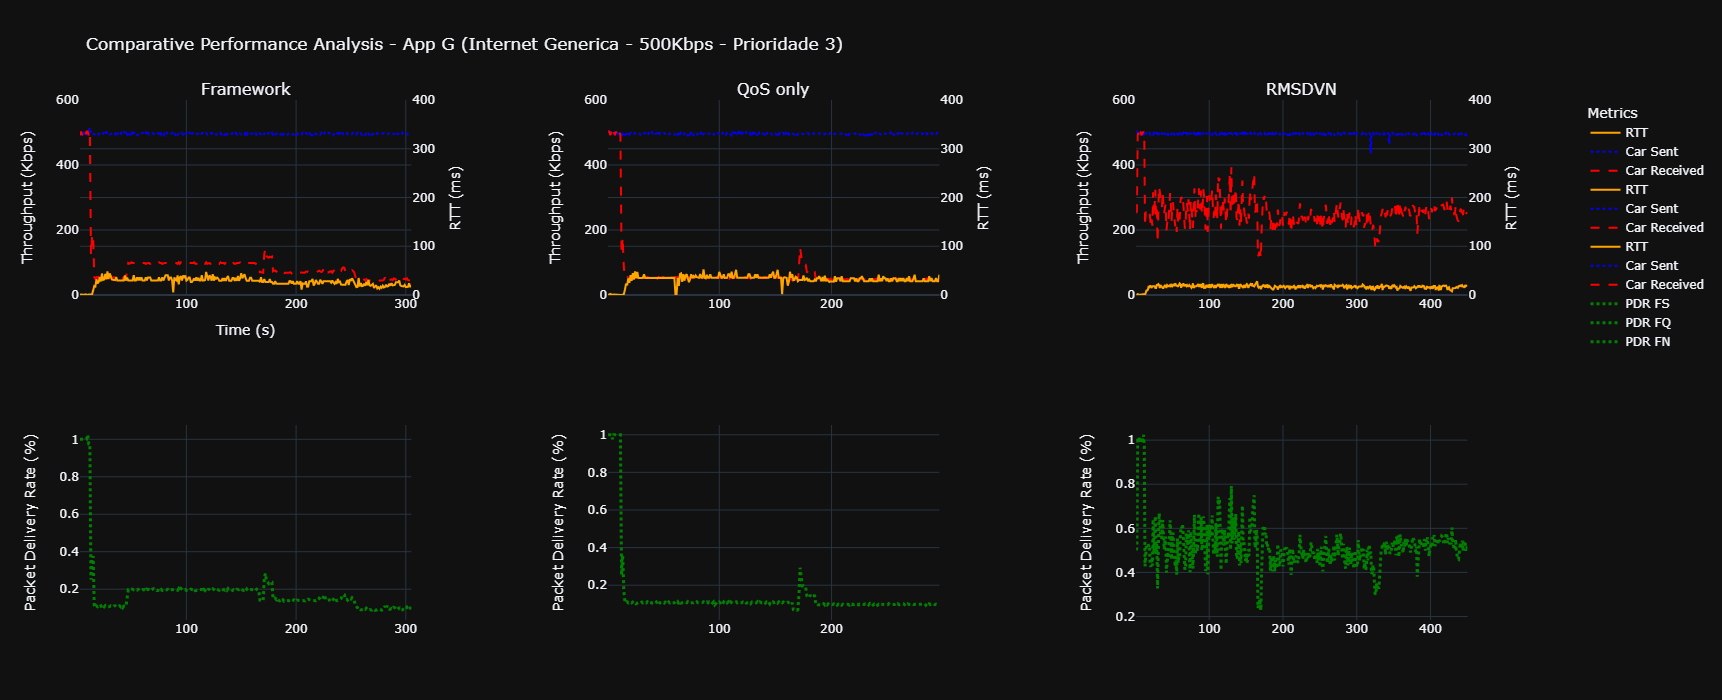

In [14]:
# Criando figura com subplots - App G (Internet Generica - 500Kbps - Prioridade 3)
fig = make_subplots(rows=2, cols=3, subplot_titles=('Framework', 'QoS only', 'RMSDVN'),
                    specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}], [{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

# Filtrando App G
dfsg = df_sim_ohe.query('`ohe__app_G` == 1 and `ohe__approach_FS` == 1')
dfqg = df_sim_ohe.query('`ohe__app_G` == 1 and `ohe__approach_FQ` == 1')
dfng = df_sim_ohe.query('`ohe__app_G` == 1 and `ohe__approach_FN` == 1')

# Adicionando dados aos subplots
fig.add_trace(go.Scatter(x=dfsg['time'], y=dfsg[rtt], mode='lines', name='RTT', line=dict(color='orange', width=2)), row=1, col=1, secondary_y=True)
fig.add_trace(go.Scatter(x=dfsg['time'], y=dfsg['env_car']/1000, mode='lines', name='Car Sent', line=dict(color='blue', dash='dot')), row=1, col=1, secondary_y=False)
fig.add_trace(go.Scatter(x=dfsg['time'], y=dfsg['rec_serv']/1000, mode='lines', name='Car Received', line=dict(color='red', dash='dash')), row=1, col=1, secondary_y=False)

fig.add_trace(go.Scatter(x=dfqg['time'], y=dfqg[rtt], mode='lines', name='RTT', line=dict(color='orange', width=2)), row=1, col=2, secondary_y=True)
fig.add_trace(go.Scatter(x=dfqg['time'], y=dfqg['env_car']/1000, mode='lines', name='Car Sent', line=dict(color='blue', dash='dot')), row=1, col=2, secondary_y=False)
fig.add_trace(go.Scatter(x=dfqg['time'], y=dfqg['rec_serv']/1000, mode='lines', name='Car Received', line=dict(color='red', dash='dash')), row=1, col=2, secondary_y=False)

fig.add_trace(go.Scatter(x=dfng['time'], y=dfng[rtt], mode='lines', name='RTT', line=dict(color='orange', width=2)), row=1, col=3, secondary_y=True)
fig.add_trace(go.Scatter(x=dfng['time'], y=dfng['env_car']/1000, mode='lines', name='Car Sent', line=dict(color='blue', dash='dot')), row=1, col=3, secondary_y=False)
fig.add_trace(go.Scatter(x=dfng['time'], y=dfng['rec_serv']/1000, mode='lines', name='Car Received', line=dict(color='red', dash='dash')), row=1, col=3, secondary_y=False)

fig.add_trace(go.Scatter(x=dfsg['time'], y=dfsg['pdr'], mode='lines', name='PDR FS', line=dict(color='green', dash='dot', width=3)), row=2, col=1, secondary_y=False)
fig.add_trace(go.Scatter(x=dfqg['time'], y=dfqg['pdr'], mode='lines', name='PDR FQ', line=dict(color='green', dash='dot', width=3)), row=2, col=2, secondary_y=False)
fig.add_trace(go.Scatter(x=dfng['time'], y=dfng['pdr'], mode='lines', name='PDR FN', line=dict(color='green', dash='dot', width=3)), row=2, col=3, secondary_y=False)

# Atualizando layout para um design coerente
fig.update_layout(
    title='Comparative Performance Analysis - App G (Internet Generica - 500Kbps - Prioridade 3)',
    xaxis_title='Time (s)',
    legend_title='Metrics',
    template='plotly_dark',
    height=700,  # Ajustar a altura se necessário
    #width=3700   # Ajustar a largura para caber os três plots
)

# Atualizando configurações dos eixos y
for i in range(1, 4):
    fig.update_yaxes(title_text="Throughput (Kbps)", range=[0, 600], row=1, col=i, secondary_y=False)
    fig.update_yaxes(title_text="Packet Delivery Rate (%)", row=2, col=i, secondary_y=False)
    fig.update_yaxes(title_text="RTT (ms)", range=[0, 400], row=1, col=i, secondary_y=True)  # Ajuste do range do eixo Y secundário

# Mostrando gráfico
fig.show()

#### Define requisitos, classifica e analise impacto - App G (Internet Generica - 500Kbps - Prioridade 3)

In [15]:
# Requisitos de impacto App G (Internet Generica - 500Kbps - Prioridade 3)
low = ['<=50', '>=50', '>250']
medium = ['<=100', '>=35', '>=100']
high = ['>100', '<35', '<100']
imp_g = {'low': low, 'medium':medium, 'high':high}
imp_g = pd.DataFrame.from_dict(imp_g)
imp_g.index = ['RTT (ms)', 'PDR (%)', 'Rx (Kbps)']
print('\nRequisitos de impacto App G (Internet Generica - 500Kbps - Prioridade 3)\n')
imp_g = pd.DataFrame.from_dict(imp_g)
display(imp_g)

# Classificando G
df_sim_ohe.loc[(df_sim_ohe['ohe__app_G'] == 1) & (df_sim_ohe[rtt] <= 50) & (df_sim_ohe['pdr'] >= 0.50) & (df_sim_ohe['rec_serv'] >= 250000),'impact_level'] = 'low'
df_sim_ohe.loc[(df_sim_ohe['ohe__app_G'] == 1) & (df_sim_ohe[rtt] <= 100) & (df_sim_ohe['pdr'] >= 0.35) & (df_sim_ohe['rec_serv'] >= 100000) & (df_sim_ohe['impact_level'] != 'low'), 'impact_level'] = 'medium'
df_sim_ohe.loc[(df_sim_ohe['ohe__app_G'] == 1) & ((df_sim_ohe[rtt] > 100) | (df_sim_ohe['pdr'] < 0.35) | (df_sim_ohe['rec_serv'] < 100000)) & (df_sim_ohe['impact_level'] != 'medium'), 'impact_level'] = 'high'

# App G - analise impacto
imp_g_fs = pd.DataFrame(df_sim_ohe.query('`ohe__app_G` == 1 and `ohe__approach_FS` == 1').groupby(['impact_level']).count()['ohe__approach_FS'])
imp_g_fq = pd.DataFrame(df_sim_ohe.query('`ohe__app_G` == 1 and `ohe__approach_FQ` == 1').groupby(['impact_level']).count()['ohe__approach_FQ'])
imp_g_fn = pd.DataFrame(df_sim_ohe.query('`ohe__app_G` == 1 and `ohe__approach_FN` == 1').groupby(['impact_level']).count()['ohe__approach_FN'])
analise_g = imp_g_fs.join(imp_g_fq).join(imp_g_fn)
analise_g.columns = ['FS', 'FQ', 'FN']
print('\nAnalise de impacto App G (Internet Generica - 500Kbps - Prioridade 3)\n')
display(analise_g.T.style.background_gradient())


Requisitos de impacto App G (Internet Generica - 500Kbps - Prioridade 3)



low medium  high
RTT (ms)   <=50  <=100  >100
PDR (%)    >=50   >=35   <35
Rx (Kbps)  >250  >=100  <100


Analise de impacto App G (Internet Generica - 500Kbps - Prioridade 3)



### App S (Safety/MEC - 500Kbps - Priority 0)

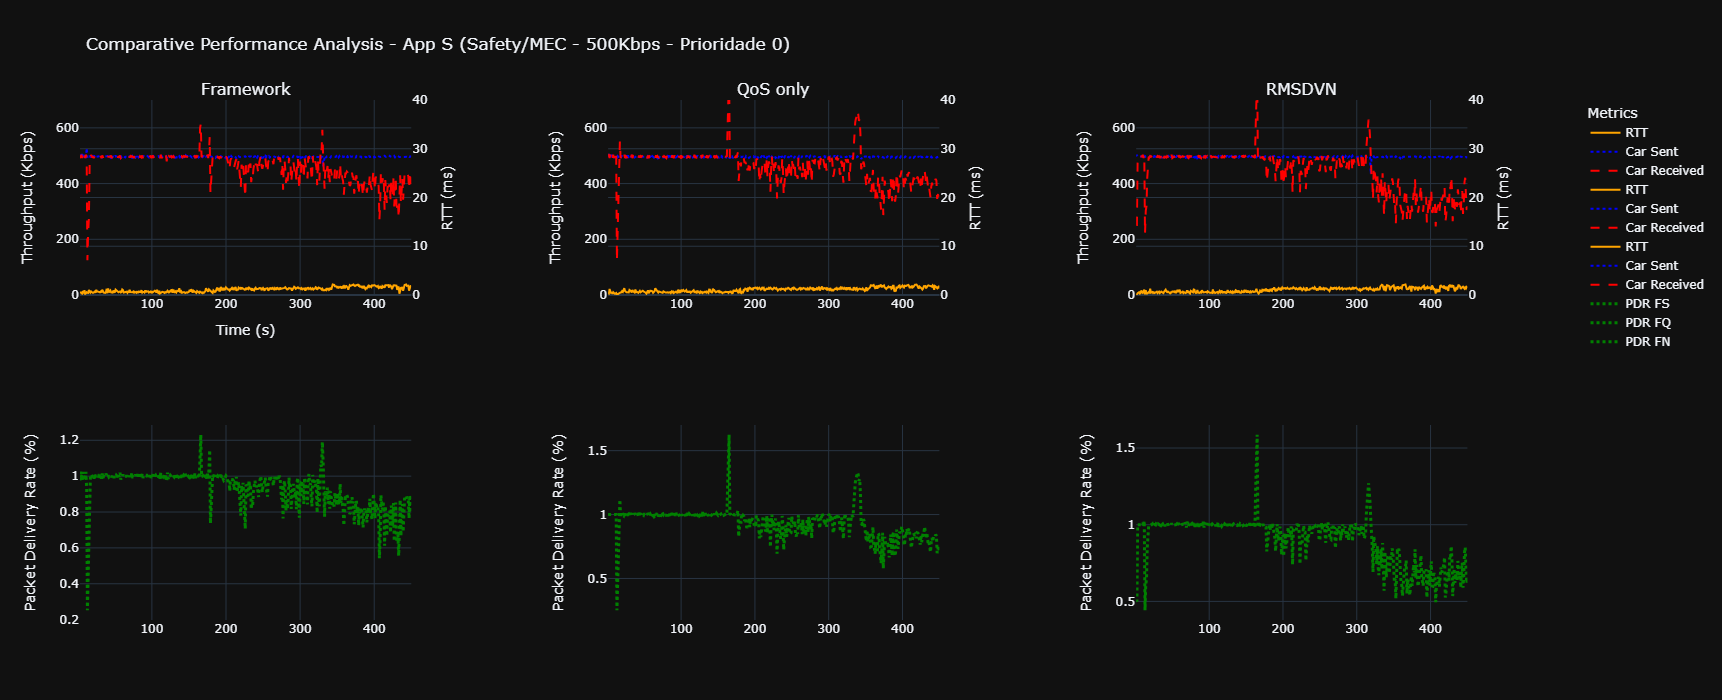

In [16]:
# Criando figura com subplots - App S (Safety/MEC - 500Kbps - Prioridade 0)
fig = make_subplots(rows=2, cols=3, subplot_titles=('Framework', 'QoS only', 'RMSDVN'),
                    specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}], [{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

# Filtrando App S
dfss = df_sim_ohe.query('`ohe__app_S` == 1 and `ohe__approach_FS` == 1')
dfqs = df_sim_ohe.query('`ohe__app_S` == 1 and `ohe__approach_FQ` == 1')
dfns = df_sim_ohe.query('`ohe__app_S` == 1 and `ohe__approach_FN` == 1')

# Adicionando dados aos subplots
fig.add_trace(go.Scatter(x=dfss['time'], y=dfss[rtt], mode='lines', name='RTT', line=dict(color='orange', width=2)), row=1, col=1, secondary_y=True)
fig.add_trace(go.Scatter(x=dfss['time'], y=dfss['env_car']/1000, mode='lines', name='Car Sent', line=dict(color='blue', dash='dot')), row=1, col=1, secondary_y=False)
fig.add_trace(go.Scatter(x=dfss['time'], y=dfss['rec_serv']/1000, mode='lines', name='Car Received', line=dict(color='red', dash='dash')), row=1, col=1, secondary_y=False)

fig.add_trace(go.Scatter(x=dfqs['time'], y=dfqs[rtt], mode='lines', name='RTT', line=dict(color='orange', width=2)), row=1, col=2, secondary_y=True)
fig.add_trace(go.Scatter(x=dfqs['time'], y=dfqs['env_car']/1000, mode='lines', name='Car Sent', line=dict(color='blue', dash='dot')), row=1, col=2, secondary_y=False)
fig.add_trace(go.Scatter(x=dfqs['time'], y=dfqs['rec_serv']/1000, mode='lines', name='Car Received', line=dict(color='red', dash='dash')), row=1, col=2, secondary_y=False)

fig.add_trace(go.Scatter(x=dfns['time'], y=dfns[rtt], mode='lines', name='RTT', line=dict(color='orange', width=2)), row=1, col=3, secondary_y=True)
fig.add_trace(go.Scatter(x=dfns['time'], y=dfns['env_car']/1000, mode='lines', name='Car Sent', line=dict(color='blue', dash='dot')), row=1, col=3, secondary_y=False)
fig.add_trace(go.Scatter(x=dfns['time'], y=dfns['rec_serv']/1000, mode='lines', name='Car Received', line=dict(color='red', dash='dash')), row=1, col=3, secondary_y=False)

fig.add_trace(go.Scatter(x=dfss['time'], y=dfss['pdr'], mode='lines', name='PDR FS', line=dict(color='green', dash='dot', width=3)), row=2, col=1, secondary_y=False)
fig.add_trace(go.Scatter(x=dfqs['time'], y=dfqs['pdr'], mode='lines', name='PDR FQ', line=dict(color='green', dash='dot', width=3)), row=2, col=2, secondary_y=False)
fig.add_trace(go.Scatter(x=dfns['time'], y=dfns['pdr'], mode='lines', name='PDR FN', line=dict(color='green', dash='dot', width=3)), row=2, col=3, secondary_y=False)

# Atualizando layout para um design coerente
fig.update_layout(
    title='Comparative Performance Analysis - App S (Safety/MEC - 500Kbps - Prioridade 0)',
    xaxis_title='Time (s)',
    legend_title='Metrics',
    template='plotly_dark',
    height=700,  # Ajustar a altura se necessário
    #width=3700   # Ajustar a largura para caber os três plots
)

# Atualizando configurações dos eixos y
for i in range(1, 4):
    fig.update_yaxes(title_text="Throughput (Kbps)", range=[0, 700], row=1, col=i, secondary_y=False)
    fig.update_yaxes(title_text="Packet Delivery Rate (%)", row=2, col=i, secondary_y=False)
    fig.update_yaxes(title_text="RTT (ms)", range=[0, 40], row=1, col=i, secondary_y=True)  # Ajuste do range do eixo Y secundário

# Mostrando gráfico
fig.show()

#### Define requisitos, classifica e analise impacto - App S (Safety/MEC - 500Kbps - Prioridade 0)

In [17]:
# Requisitos de impacto App S (Safety/MEC - 500Kbps - Prioridade 0)
low = ['<=10', '>=85', '>350']
medium = ['<=20', '>=70', '>=250']
high = ['>20', '<70', '<250']
imp_s = {'low': low, 'medium':medium, 'high':high}
imp_s = pd.DataFrame.from_dict(imp_s)
imp_s.index = ['RTT (ms)', 'PDR (%)', 'Rx (Kbps)']
print('\nRequisitos de impacto App S (Safety/MEC - 500Kbps - Prioridade 0)\n')
imp_s = pd.DataFrame.from_dict(imp_s)
display(imp_s)

# Classificando S
df_sim_ohe.loc[(df_sim_ohe['ohe__app_S'] == 1) & (df_sim_ohe[rtt] <= 10) & (df_sim_ohe['pdr'] >= 0.85) & (df_sim_ohe['rec_serv'] >= 350000),'impact_level'] = 'low'
df_sim_ohe.loc[(df_sim_ohe['ohe__app_S'] == 1) & (df_sim_ohe[rtt] <= 20) & (df_sim_ohe['pdr'] >= 0.70) & (df_sim_ohe['rec_serv'] >= 250000) & (df_sim_ohe['impact_level'] != 'low'), 'impact_level'] = 'medium'
df_sim_ohe.loc[(df_sim_ohe['ohe__app_S'] == 1) & ((df_sim_ohe[rtt] > 20) | (df_sim_ohe['pdr'] < 0.70) | (df_sim_ohe['rec_serv'] < 250000)) & (df_sim_ohe['impact_level'] != 'medium'), 'impact_level'] = 'high'

# App S - analise impacto
imp_s_fs = pd.DataFrame(df_sim_ohe.query('`ohe__app_S` == 1 and `ohe__approach_FS` == 1').groupby(['impact_level']).count()['ohe__approach_FS'])
imp_s_fq = pd.DataFrame(df_sim_ohe.query('`ohe__app_S` == 1 and `ohe__approach_FQ` == 1').groupby(['impact_level']).count()['ohe__approach_FQ'])
imp_s_fn = pd.DataFrame(df_sim_ohe.query('`ohe__app_S` == 1 and `ohe__approach_FN` == 1').groupby(['impact_level']).count()['ohe__approach_FN'])
analise_s = imp_s_fs.join(imp_s_fq).join(imp_s_fn)
analise_s.columns = ['FS', 'FQ', 'FN']
print('\nAnalise de impacto App S (Safety/MEC - 500Kbps - Prioridade 0)\n')
display(analise_s.T.style.background_gradient())


Requisitos de impacto App S (Safety/MEC - 500Kbps - Prioridade 0)



low medium  high
RTT (ms)   <=10   <=20   >20
PDR (%)    >=85   >=70   <70
Rx (Kbps)  >350  >=250  <250


Analise de impacto App S (Safety/MEC - 500Kbps - Prioridade 0)



### Consolidado - analise de impacto

In [18]:
# Consolidado classes
imp_e.join(imp_e2, lsuffix='_e', rsuffix='_e2').join(imp_g).join(imp_s, lsuffix='_g', rsuffix='_s').T.rename(columns={'RTT(ms))': "RTT'(ms)"})

RTT (ms) PDR (%) Rx (Kbps)
low_e        <=200    >=80      >350
medium_e     <=250    >=50     >=200
high_e        >250     <50      <200
low_e2       <=200    >=80      >350
medium_e2    <=250    >=50     >=200
high_e2       >250     <50      <200
low_g         <=50    >=50      >250
medium_g     <=100    >=35     >=100
high_g        >100     <35      <100
low_s         <=10    >=85      >350
medium_s      <=20    >=70     >=250
high_s         >20     <70      <250

In [19]:
# Consolidado impacto
analise_e.join(analise_e2, lsuffix='_e', rsuffix='_e2').join(analise_g).join(analise_s, lsuffix='_g', rsuffix='_s').T.sort_values(by=['low'], ascending=False).style.background_gradient()

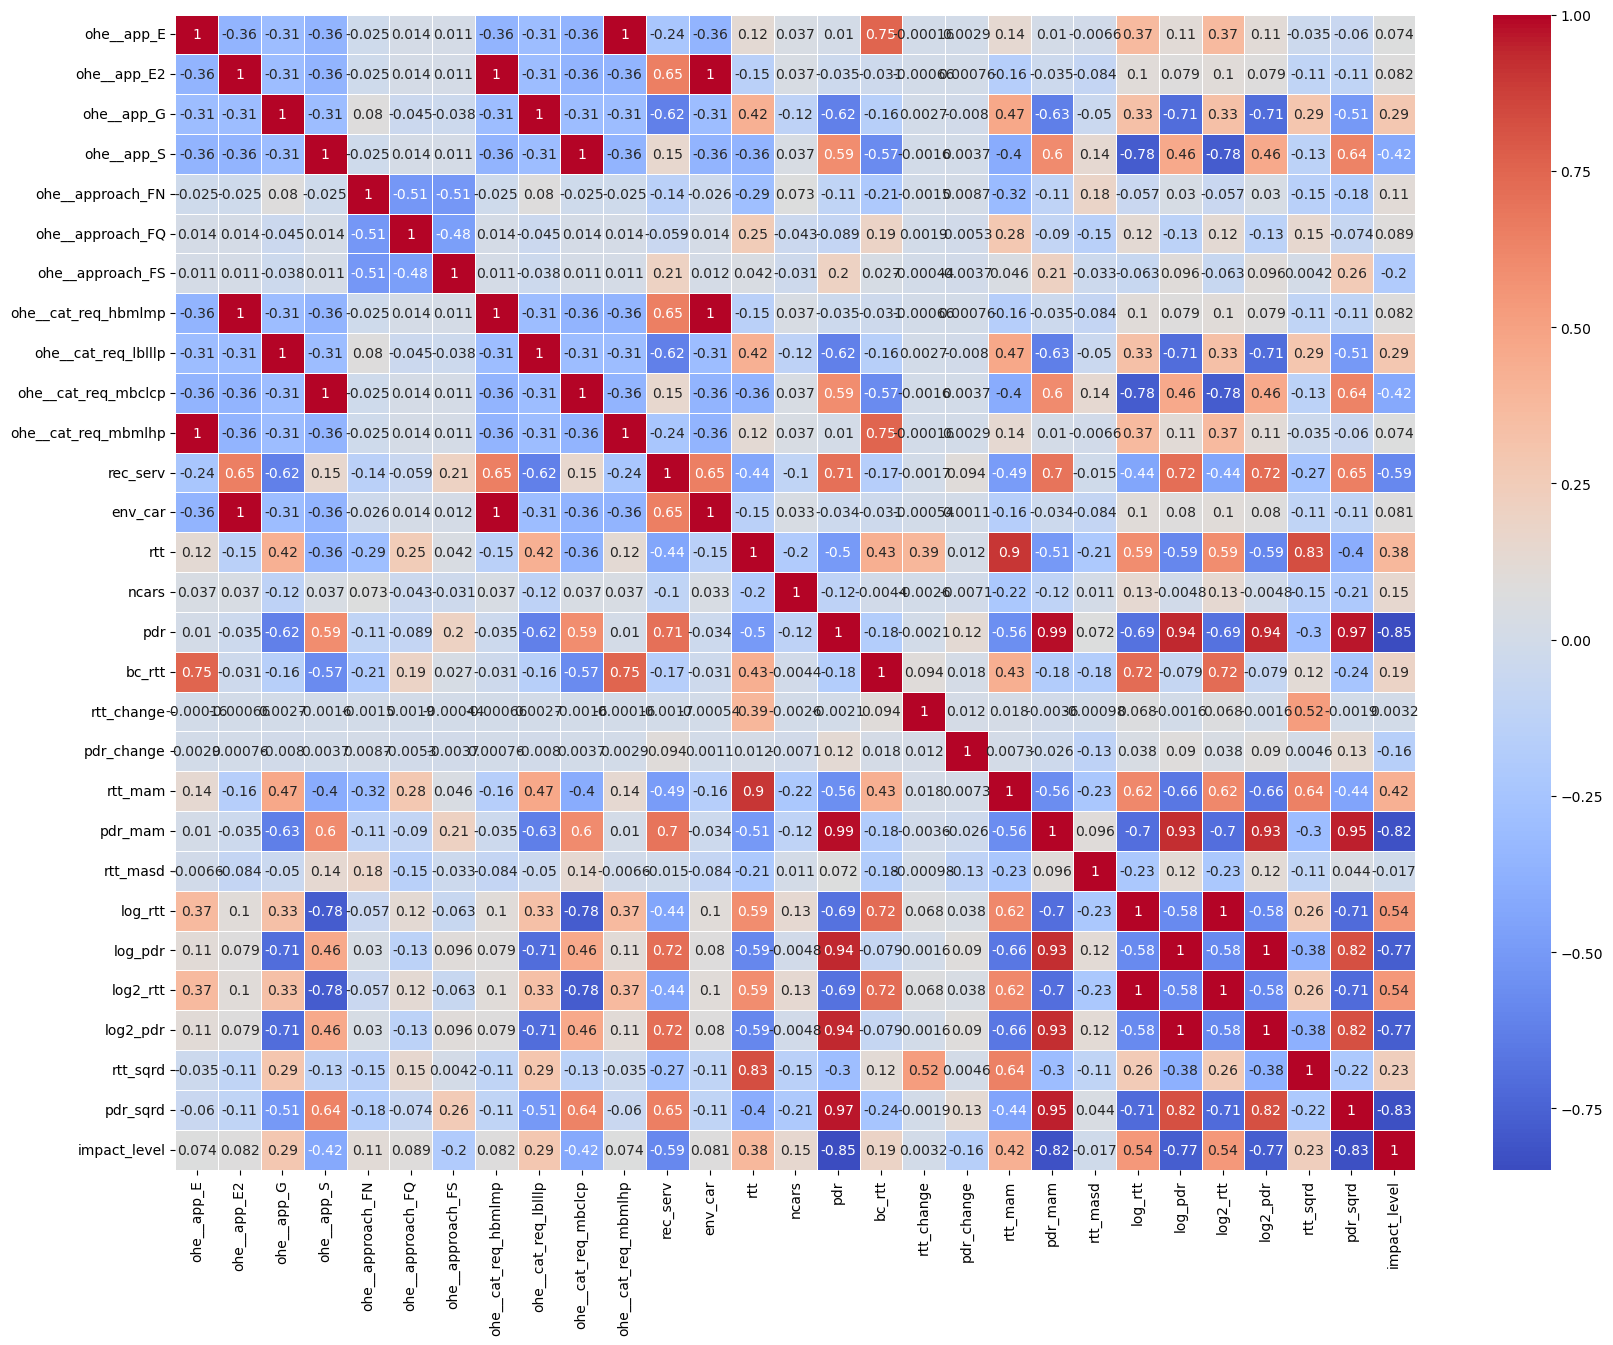

In [20]:
# Correlaçao consolidada
x = df_sim_ohe.drop(columns=['time'])
x['impact_level'].replace({'low':0, 'medium':1, 'high':2}, inplace = True)
corr_matrix = x.corr()

# Configurando o tamanho da figura
plt.figure(figsize=(20, 15))  # Ajuste as dimensões conforme necessário

sns.heatmap(corr_matrix, annot=True, linewidths = .6, cmap='coolwarm')
plt.show()

## Treinamento Deep Learning

### Analise preliminar dos dados

In [21]:
df_sim_ohe.columns

Index(['ohe__app_E', 'ohe__app_E2', 'ohe__app_G', 'ohe__app_S',
       'ohe__approach_FN', 'ohe__approach_FQ', 'ohe__approach_FS',
       'ohe__cat_req_hbmlmp', 'ohe__cat_req_lblllp', 'ohe__cat_req_mbclcp',
       'ohe__cat_req_mbmlhp', 'time', 'rec_serv', 'env_car', 'rtt', 'ncars',
       'pdr', 'bc_rtt', 'rtt_change', 'pdr_change', 'rtt_mam', 'pdr_mam',
       'rtt_masd', 'log_rtt', 'log_pdr', 'log2_rtt', 'log2_pdr', 'rtt_sqrd',
       'pdr_sqrd', 'impact_level'],
      dtype='object')

In [22]:
for col in ['ohe__app_E',  'ohe__app_E2', 'ohe__app_G', 'ohe__app_S', 'ohe__approach_FN', 'ohe__approach_FQ', 'ohe__approach_FS', 'ohe__cat_req_hbmlmp', 'ohe__cat_req_lblllp', 'ohe__cat_req_mbclcp', 'ohe__cat_req_mbmlhp']:
    df_sim_ohe[col] = df_sim_ohe[col].astype('int32')

for col in ['ncars',  'time']:
    df_sim_ohe[col] = df_sim_ohe[col].astype('int32')

for col in ['rec_serv',  'bc_rtt',  'rtt_change', 'pdr_change', 'rtt_mam', 'log_pdr', 'log2_rtt', 'log2_pdr', 'rtt_sqrd', 'pdr_sqrd', 'env_car', 'pdr', 'pdr_mam', 'rtt_masd', 'rtt']:
    df_sim_ohe[col] = df_sim_ohe[col].astype('float64')

In [23]:
df_sim_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5093 entries, 0 to 5092
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ohe__app_E           5093 non-null   int32  
 1   ohe__app_E2          5093 non-null   int32  
 2   ohe__app_G           5093 non-null   int32  
 3   ohe__app_S           5093 non-null   int32  
 4   ohe__approach_FN     5093 non-null   int32  
 5   ohe__approach_FQ     5093 non-null   int32  
 6   ohe__approach_FS     5093 non-null   int32  
 7   ohe__cat_req_hbmlmp  5093 non-null   int32  
 8   ohe__cat_req_lblllp  5093 non-null   int32  
 9   ohe__cat_req_mbclcp  5093 non-null   int32  
 10  ohe__cat_req_mbmlhp  5093 non-null   int32  
 11  time                 5093 non-null   int32  
 12  rec_serv             5093 non-null   float64
 13  env_car              5093 non-null   float64
 14  rtt                  5093 non-null   float64
 15  ncars                5093 non-null   i

In [24]:
df_sim_ohe.describe()[['rec_serv',  'bc_rtt',  'rtt_change', 'pdr_change', 'rtt_mam', 'log_pdr', 'log2_rtt', 'log2_pdr', 'rtt_sqrd', 'pdr_sqrd', 'env_car', 'pdr', 'pdr_mam', 'rtt_masd', 'rtt']]

rec_serv       bc_rtt    rtt_change   pdr_change       rtt_mam  \
count  5.093000e+03  5093.000000   5093.000000  5093.000000   5093.000000   
mean   4.040460e+05    35.441836      6.092860    -0.000667   1745.843867   
std    2.036095e+05    36.002048   2215.975199     0.066070   2570.471153   
min    3.295600e+04     0.058099 -29411.200000    -0.750000      0.180133   
25%    2.660448e+05     1.642420   -183.866667    -0.014470      8.646333   
50%    4.270662e+05    28.503553     -0.056545     0.000000    897.818182   
75%    4.985344e+05    52.143920    150.866667     0.014563   2240.987222   
max    1.224765e+06   156.823544  29393.200000     0.500000  20608.000000   

           log_pdr     log2_rtt     log2_pdr      rtt_sqrd     pdr_sqrd  \
count  5093.000000  5093.000000  5093.000000  5.093000e+03  5093.000000   
mean     -0.570755     7.724045    -0.823425  1.125206e+07     0.495056   
std       0.612719     4.444370     0.883966  5.282345e+07     0.344146   
min      -2.705015    -4.044538    -3.902512  3.672360e-03     0.004472   
25%      -0.689113     3.017328    -0.994180  6.555601e+01     0.252025   
50%      -0.472906     9.695861    -0.682260  6.878440e+05     0.388364   
75%      -0.101704    11.053790    -0.146728  4.519026e+06     0.815945   
max       0.485133    15.220537     0.699898  1.457728e+09     2.638644   

            env_car          pdr      pdr_mam     rtt_masd           rtt  
count  5.093000e+03  5093.000000  5093.000000  5093.000000   5093.000000  
mean   6.255493e+05     0.649091     0.649448     0.029094   1746.482510  
std    2.160867e+05     0.271573     0.268313     0.043951   2864.169374  
min    4.341895e+05     0.066869     0.067672     0.000000      0.060600  
25%    4.953387e+05     0.502021     0.504004     0.005388      8.096667  
50%    4.967913e+05     0.623188     0.626388     0.013182    829.363636  
75%    9.794923e+05     0.903297     0.900517     0.035856   2125.800000  
max    1.018640e+06     1.624390     1.412720     0.517749  38180.200000

In [25]:
df_sim_ohe.describe()[['ncars',  'time']]

ncars         time
count  5093.000000  5093.000000
mean      9.429217   217.034950
std       4.127812   127.713621
min       1.000000     1.000000
25%       5.000000   107.000000
50%      11.000000   213.000000
75%      11.000000   323.000000
max      16.000000   450.000000

In [26]:
df_sim_ohe.describe()[['ohe__app_E',  'ohe__app_E2', 'ohe__app_G', 'ohe__app_S', 'ohe__approach_FN', 'ohe__approach_FQ', 'ohe__approach_FS', 'ohe__cat_req_hbmlmp', 'ohe__cat_req_lblllp', 'ohe__cat_req_mbclcp', 'ohe__cat_req_mbmlhp']]

ohe__app_E  ohe__app_E2   ohe__app_G   ohe__app_S  ohe__approach_FN  \
count  5093.000000  5093.000000  5093.000000  5093.000000       5093.000000   
mean      0.264677     0.264677     0.205969     0.264677          0.353426   
std       0.441204     0.441204     0.404448     0.441204          0.478081   
min       0.000000     0.000000     0.000000     0.000000          0.000000   
25%       0.000000     0.000000     0.000000     0.000000          0.000000   
50%       0.000000     0.000000     0.000000     0.000000          0.000000   
75%       1.000000     1.000000     0.000000     1.000000          1.000000   
max       1.000000     1.000000     1.000000     1.000000          1.000000   

       ohe__approach_FQ  ohe__approach_FS  ohe__cat_req_hbmlmp  \
count       5093.000000       5093.000000          5093.000000   
mean           0.323189          0.323385             0.264677   
std            0.467740          0.467814             0.441204   
min            0.000000          0.000000             0.000000   
25%            0.000000          0.000000             0.000000   
50%            0.000000          0.000000             0.000000   
75%            1.000000          1.000000             1.000000   
max            1.000000          1.000000             1.000000   

       ohe__cat_req_lblllp  ohe__cat_req_mbclcp  ohe__cat_req_mbmlhp  
count          5093.000000          5093.000000          5093.000000  
mean              0.205969             0.264677             0.264677  
std               0.404448             0.441204             0.441204  
min               0.000000             0.000000             0.000000  
25%               0.000000             0.000000             0.000000  
50%               0.000000             0.000000             0.000000  
75%               0.000000             1.000000             1.000000  
max               1.000000             1.000000             1.000000

In [27]:
df_sim_ohe.describe()

ohe__app_E  ohe__app_E2   ohe__app_G   ohe__app_S  ohe__approach_FN  \
count  5093.000000  5093.000000  5093.000000  5093.000000       5093.000000   
mean      0.264677     0.264677     0.205969     0.264677          0.353426   
std       0.441204     0.441204     0.404448     0.441204          0.478081   
min       0.000000     0.000000     0.000000     0.000000          0.000000   
25%       0.000000     0.000000     0.000000     0.000000          0.000000   
50%       0.000000     0.000000     0.000000     0.000000          0.000000   
75%       1.000000     1.000000     0.000000     1.000000          1.000000   
max       1.000000     1.000000     1.000000     1.000000          1.000000   

       ohe__approach_FQ  ohe__approach_FS  ohe__cat_req_hbmlmp  \
count       5093.000000       5093.000000          5093.000000   
mean           0.323189          0.323385             0.264677   
std            0.467740          0.467814             0.441204   
min            0.000000          0.000000             0.000000   
25%            0.000000          0.000000             0.000000   
50%            0.000000          0.000000             0.000000   
75%            1.000000          1.000000             1.000000   
max            1.000000          1.000000             1.000000   

       ohe__cat_req_lblllp  ohe__cat_req_mbclcp  ...    rtt_change  \
count          5093.000000          5093.000000  ...   5093.000000   
mean              0.205969             0.264677  ...      6.092860   
std               0.404448             0.441204  ...   2215.975199   
min               0.000000             0.000000  ... -29411.200000   
25%               0.000000             0.000000  ...   -183.866667   
50%               0.000000             0.000000  ...     -0.056545   
75%               0.000000             1.000000  ...    150.866667   
max               1.000000             1.000000  ...  29393.200000   

        pdr_change       rtt_mam      pdr_mam     rtt_masd      log_pdr  \
count  5093.000000   5093.000000  5093.000000  5093.000000  5093.000000   
mean     -0.000667   1745.843867     0.649448     0.029094    -0.570755   
std       0.066070   2570.471153     0.268313     0.043951     0.612719   
min      -0.750000      0.180133     0.067672     0.000000    -2.705015   
25%      -0.014470      8.646333     0.504004     0.005388    -0.689113   
50%       0.000000    897.818182     0.626388     0.013182    -0.472906   
75%       0.014563   2240.987222     0.900517     0.035856    -0.101704   
max       0.500000  20608.000000     1.412720     0.517749     0.485133   

          log2_rtt     log2_pdr      rtt_sqrd     pdr_sqrd  
count  5093.000000  5093.000000  5.093000e+03  5093.000000  
mean      7.724045    -0.823425  1.125206e+07     0.495056  
std       4.444370     0.883966  5.282345e+07     0.344146  
min      -4.044538    -3.902512  3.672360e-03     0.004472  
25%       3.017328    -0.994180  6.555601e+01     0.252025  
50%       9.695861    -0.682260  6.878440e+05     0.388364  
75%      11.053790    -0.146728  4.519026e+06     0.815945  
max      15.220537     0.699898  1.457728e+09     2.638644  

[8 rows x 28 columns]

#### Pre-processamento

In [28]:
# Preparar os dados
features = df_sim_ohe.drop(columns=['time', 'impact_level'])
labels = df_sim_ohe['impact_level']
labels.replace({'low':0, 'medium':1, 'high':2}, inplace = True)

df_sim_ohe.to_csv('raw_full.csv', index=False)
features.to_csv('features.csv', index=False) 
labels.to_csv('labels.csv', index=False) 

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.metrics import precision_score, recall_score, f1_score

# Normalizar as características numéricas
scaler = StandardScaler()
normalizar = [ 'rec_serv', 'env_car', 'rtt', 'ncars', 'pdr', 'bc_rtt', 'rtt_change', 'pdr_change', 'rtt_mam', 'pdr_mam', 'rtt_masd',
              'log_rtt', 'log_pdr', 'log2_rtt', 'log2_pdr', 'rtt_sqrd', 'pdr_sqrd']
features.loc[:, normalizar] = scaler.fit_transform(features[normalizar])
features = features.astype('float32')

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [30]:
labels.unique()

array([0, 2, 1], dtype=int64)

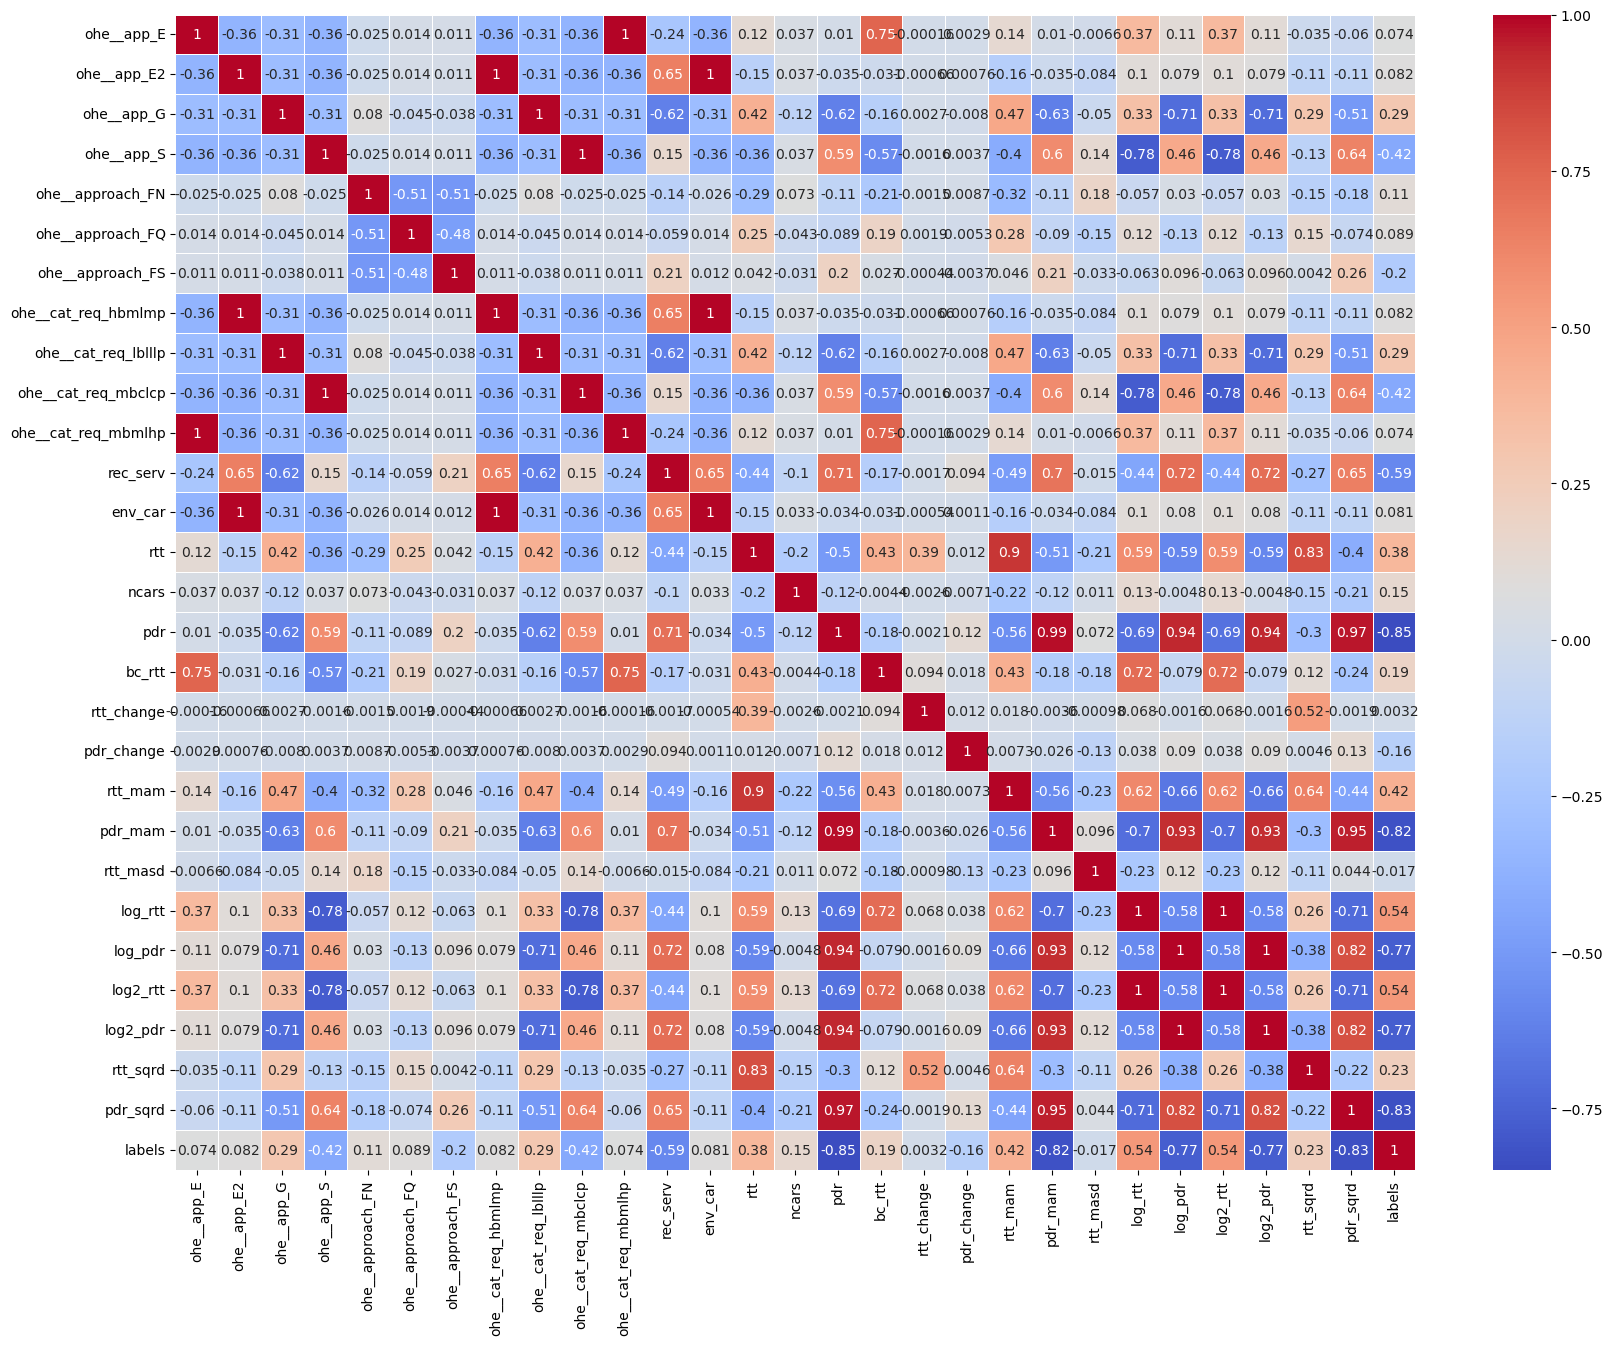

In [31]:
# Analise features pré-processadas
f = features
f['labels'] = labels
corr_matrix = f.corr()

# Configurando o tamanho da figura
plt.figure(figsize=(20, 15))  # Ajuste as dimensões conforme necessário

sns.heatmap(corr_matrix, annot=True, linewidths = .6, cmap='coolwarm')
plt.show()

### Deep Network basic DNN

In [32]:
from tensorflow.keras.layers import Dense, Input

# Para analise posterior
# Dados normalizados
# Analise de Arquitetura da Rede Neural

# Construir o modelo
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Definindo forma de entrada com Input
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(np.unique(labels)), activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Fazer predições para calcular precision, recall e f1-score
predictions_mlp = model.predict(X_test)
predicted_classes_mlp = np.argmax(predictions_mlp, axis=1)

# Avaliar o modelo - calcular as métricas globais
loss, accuracy_mlp = model.evaluate(X_test, y_test)
print(f"Accuracy (Global): {accuracy_mlp*100:.2f}%")

# Gerar o relatório por classe
print("\nClassification Report:")
report = classification_report(y_test, predicted_classes_mlp, target_names=['low', 'medium', 'high'], digits=4)
print(report)

# Se precisar armazenar as métricas para cada classe, você pode fazer assim:
from sklearn.metrics import precision_recall_fscore_support

# Obter métricas por classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, predicted_classes_mlp)

# Calcular a acurácia por classe manualmente
accuracy_per_class = []
for cls in range(len(support)):
    correct_predictions = sum((y_test == cls) & (predicted_classes_mlp == cls))
    accuracy = correct_predictions / support[cls]
    accuracy_per_class.append(accuracy)

# Exibir as métricas organizadas
metrics_per_class = pd.DataFrame({
    'Class': ['low', 'medium', 'high'],
    'Accuracy': accuracy_per_class,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("\nMetrics Per Class:")
print(metrics_per_class)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6429 - loss: 0.8165 - val_accuracy: 0.8540 - val_loss: 0.3416
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.3098 - val_accuracy: 0.9374 - val_loss: 0.1956
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9381 - loss: 0.1864 - val_accuracy: 0.9509 - val_loss: 0.1492
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9559 - loss: 0.1341 - val_accuracy: 0.9669 - val_loss: 0.1144
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9607 - loss: 0.1037 - val_accuracy: 0.9669 - val_loss: 0.1056
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9728 - loss: 0.0882 - val_accuracy: 0.9706 - val_loss: 0.1018
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9806 - loss: 0.0710 - val_accuracy: 0.9681 - val_loss: 0.0953
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0646 - val_accuracy: 0.

In [33]:
from tensorflow.keras.layers import Dense, Input

# Para analise posterior
# Dados normalizados
# Analise de Arquitetura da Rede Neural

# Construir o modelo
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Definindo forma de entrada com Input
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(np.unique(labels)), activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Fazer predições para calcular precision, recall e f1-score
predictions_mlp = model.predict(X_test)
predicted_classes_mlp = np.argmax(predictions_mlp, axis=1)

# Avaliar o modelo - calcular Acuracia, Precisão, Recall e F1-Score manualmente
loss, accuracy_mlp, = model.evaluate(X_test, y_test)
precision_mlp = precision_score(y_test, predicted_classes_mlp, average='macro')
recall_mlp = recall_score(y_test, predicted_classes_mlp, average='macro')
f1_mlp = f1_score(y_test, predicted_classes_mlp, average='macro')

print(f"Accuracy: {accuracy_mlp*100:.2f}%")
print(f"Precision: {precision_mlp*100:.2f}%")
print(f"Recall: {recall_mlp*100:.2f}%")
print(f"F1-Score: {f1_mlp*100:.2f}%")

# Se precisar armazenar as métricas para cada classe, você pode fazer assim:
from sklearn.metrics import precision_recall_fscore_support

# Obter métricas por classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, predicted_classes_mlp)

# Calcular a acurácia por classe manualmente
accuracy_per_class = []
for cls in range(len(support)):
    correct_predictions = sum((y_test == cls) & (predicted_classes_mlp == cls))
    accuracy = correct_predictions / support[cls]
    accuracy_per_class.append(accuracy)

# Exibir as métricas organizadas
metrics_per_class = pd.DataFrame({
    'Class': ['low', 'medium', 'high'],
    'Accuracy': accuracy_per_class,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("\nMetrics Per Class:")
print(metrics_per_class)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6251 - loss: 0.8200 - val_accuracy: 0.8663 - val_loss: 0.3421
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8863 - loss: 0.3016 - val_accuracy: 0.9485 - val_loss: 0.1951
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9425 - loss: 0.1799 - val_accuracy: 0.9509 - val_loss: 0.1541
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9563 - loss: 0.1314 - val_accuracy: 0.9607 - val_loss: 0.1278
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9659 - loss: 0.1047 - val_accuracy: 0.9681 - val_loss: 0.1159
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9670 - loss: 0.0895 - val_accuracy: 0.9730 - val_loss: 0.1062
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9708 - loss: 0.0810 - val_accuracy: 0.9693 - val_loss: 0.1138
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.0745 - val_accuracy: 0.

### LSTM

In [34]:
from tensorflow.keras.layers import LSTM, Dense

# Reshape dos Dados: O input para uma LSTM deve ser um tensor 3D com as dimensões [samples, time steps, features].
# Foi assumido que cada amostra é um passo temporal individual com múltiplas características.
# Configuração da LSTM: A camada LSTM é configurada para ter 50 unidades. Este número pode ser ajustado para experimentação.

# Reshape input para ser [samples, time steps, features] - necessário para LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

#maximo 3 camadas; inicia com uma camada maior e na segunda cai pela metade.

# Construir o modelo
model = Sequential([
    Input(shape=(1, X_train_lstm.shape[2])),  # Definindo forma de entrada com Input
    LSTM(50),  # 50 unidades LSTM
    Dense(len(np.unique(labels)), activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Fazer predições para calsular precision, recall e f1-score
predictions_lstm = model.predict(X_test_lstm)
predicted_classes_lstm = np.argmax(predictions_lstm, axis=1)

# Avaliar o modelo - Calcular Acuracia, Precisão, Recall e F1-Score manualmente
loss, accuracy_lstm = model.evaluate(X_test_lstm, y_test)
precision_lstm = precision_score(y_test, predicted_classes_lstm, average='macro')
recall_lstm = recall_score(y_test, predicted_classes_lstm, average='macro')
f1_lstm = f1_score(y_test, predicted_classes_lstm, average='macro')

print(f"Accuracy: {accuracy_lstm*100:.2f}%")
print(f"Precision: {precision_lstm*100:.2f}%")
print(f"Recall: {recall_lstm*100:.2f}%")
print(f"F1-Score: {f1_lstm*100:.2f}%")

# Se precisar armazenar as métricas para cada classe, você pode fazer assim:
from sklearn.metrics import precision_recall_fscore_support

# Obter métricas por classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, predicted_classes_mlp)

# Calcular a acurácia por classe manualmente
accuracy_per_class = []
for cls in range(len(support)):
    correct_predictions = sum((y_test == cls) & (predicted_classes_mlp == cls))
    accuracy = correct_predictions / support[cls]
    accuracy_per_class.append(accuracy)

# Exibir as métricas organizadas
metrics_per_class = pd.DataFrame({
    'Class': ['low', 'medium', 'high'],
    'Accuracy': accuracy_per_class,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("\nMetrics Per Class:")
print(metrics_per_class)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6877 - loss: 0.8762 - val_accuracy: 0.7865 - val_loss: 0.4930
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7883 - loss: 0.4697 - val_accuracy: 0.8736 - val_loss: 0.3175
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8916 - loss: 0.3025 - val_accuracy: 0.9264 - val_loss: 0.2332
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9114 - loss: 0.2379 - val_accuracy: 0.9337 - val_loss: 0.1925
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9344 - loss: 0.1883 - val_accuracy: 0.9595 - val_loss: 0.1574
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9512 - loss: 0.1583 - val_accuracy: 0.9644 - val_loss: 0.1355
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9628 - loss: 0.1309 - val_accuracy: 0.9755 - val_loss: 0.1219
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9689 - loss: 0.1133 - val_accuracy: 0.

### RNN

In [35]:
from tensorflow.keras.layers import SimpleRNN, Dense

# Analise posterior
# As redes RNN são apropriadas para dados sequenciais, mas elas são mais básicas em comparação às LSTMs ou GRUs e podem
# ter dificuldades com dependências de longo prazo devido aos problemas de vanishing gradient.
# No entanto, elas podem ser úteis para sequências mais curtas ou como uma linha de base para comparação.
# Input Reshape: Assim como no LSTM, a entrada na RNN precisa ser um tensor 3D [amostras, passos temporais, características] (cada amostra é tratada como uma sequência de um passo temporal.
# Camada SimpleRNN: Sendo utilizada a camada SimpleRNN que é a forma mais básica de uma RNN. O número '50' indica que há 50 unidades na camada RNN.

# Reshape input para ser [samples, time steps, features] - necessário para RNN
X_train_rnn = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Construir o modelo
model = Sequential([
    Input(shape=(1, X_train_rnn.shape[2])),
    SimpleRNN(50),  # 50 unidades RNN
    Dense(len(np.unique(labels)), activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Fazer predições para calcular precision, recall, f1-score
predictions_rnn = model.predict(X_test_rnn)
predicted_classes_rnn = np.argmax(predictions_rnn, axis=1)

# Avaliar o modelo - Calcular Acuracia, Precisão, Recall e F1-Score manualmente
loss, accuracy_rnn = model.evaluate(X_test_rnn, y_test)
precision_rnn = precision_score(y_test, predicted_classes_rnn, average='macro')
recall_rnn = recall_score(y_test, predicted_classes_rnn, average='macro')
f1_rnn = f1_score(y_test, predicted_classes_rnn, average='macro')

print(f"Accuracy: {accuracy_rnn*100:.2f}%")
print(f"Precision: {precision_rnn*100:.2f}%")
print(f"Recall: {recall_rnn*100:.2f}%")
print(f"F1-Score: {f1_rnn*100:.2f}%")

# Se precisar armazenar as métricas para cada classe, você pode fazer assim:
from sklearn.metrics import precision_recall_fscore_support

# Obter métricas por classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, predicted_classes_mlp)

# Calcular a acurácia por classe manualmente
accuracy_per_class = []
for cls in range(len(support)):
    correct_predictions = sum((y_test == cls) & (predicted_classes_mlp == cls))
    accuracy = correct_predictions / support[cls]
    accuracy_per_class.append(accuracy)

# Exibir as métricas organizadas
metrics_per_class = pd.DataFrame({
    'Class': ['low', 'medium', 'high'],
    'Accuracy': accuracy_per_class,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("\nMetrics Per Class:")
print(metrics_per_class)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5685 - loss: 0.8470 - val_accuracy: 0.8172 - val_loss: 0.4213
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - loss: 0.4105 - val_accuracy: 0.8798 - val_loss: 0.3121
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 0.3158 - val_accuracy: 0.9387 - val_loss: 0.2492
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9234 - loss: 0.2499 - val_accuracy: 0.9362 - val_loss: 0.2125
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9379 - loss: 0.2098 - val_accuracy: 0.9509 - val_loss: 0.1871
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9498 - loss: 0.1821 - val_accuracy: 0.9644 - val_loss: 0.1653
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9597 - loss: 0.1644 - val_accuracy: 0.9681 - val_loss: 0.1517
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9643 - loss: 0.1458 - val_accuracy: 0.

### GRU - Gated Recurrent Units (GRU)

In [36]:
from tensorflow.keras.layers import GRU, Dense

# Analise posterior
# GRU - Gated Recurrent Units, uma variante da RNN que é capaz de capturar dependências de longo prazo mais eficientemente do que as RNNs tradicionais e com uma estrutura mais simples que as LSTMs.
# Pode ser particularmente útil se houver suspeita no dataset de que existem dependências temporais importantes que afetam a classificação.
# GRU pode proporcionar um bom equilíbrio entre complexidade e desempenho, sendo uma excelente opção para explorar dependências temporais nos datasets.
# Ajustar o número de unidades GRU, a profundidade da rede (adicionando mais camadas GRU, por exemplo), além de experimentar diferentes técnicas de regularização para evitar overfitting.
# Input Reshape: Como nas outras redes recorrentes, o input para a GRU também precisa ser um tensor 3D com as dimensões [amostras, passos temporais, características].
# Camada GRU: A camada GRU é usada com 50 unidades. GRUs são semelhantes às LSTMs, mas sem a porta de saída, o que as torna mais simples e possivelmente mais rápidas de treinar em alguns casos.
# verificaar average='macro' e impacto na acuracia

# Reshape input para ser [samples, time steps, features] - necessário para GRU
X_train_gru = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_gru = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Construir o modelo
model = Sequential([
    Input(shape=(1, X_train_gru.shape[2])),
    GRU(50),  # 50 unidades GRU
    Dense(len(np.unique(labels)), activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train_gru, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Fazer predições para calcular precision, recall, f1-score
predictions_gru = model.predict(X_test_gru)
predicted_classes_gru = np.argmax(predictions_gru, axis=1)

# Avaliar o modelo - Calcular Acuracia, Precisão, Recall e F1-Score manualmente
loss, accuracy_gru = model.evaluate(X_test_gru, y_test) 
precision_gru = precision_score(y_test, predicted_classes_gru, average='macro')
recall_gru = recall_score(y_test, predicted_classes_gru, average='macro')
f1_gru = f1_score(y_test, predicted_classes_gru, average='macro')

print(f"Accuracy: {accuracy_gru*100:.2f}%")
print(f"Precision: {precision_gru*100:.2f}%")
print(f"Recall: {recall_gru*100:.2f}%")
print(f"F1-Score: {f1_gru*100:.2f}%")

# Se precisar armazenar as métricas para cada classe, você pode fazer assim:
from sklearn.metrics import precision_recall_fscore_support

# Obter métricas por classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, predicted_classes_mlp)

# Calcular a acurácia por classe manualmente
accuracy_per_class = []
for cls in range(len(support)):
    correct_predictions = sum((y_test == cls) & (predicted_classes_mlp == cls))
    accuracy = correct_predictions / support[cls]
    accuracy_per_class.append(accuracy)

# Exibir as métricas organizadas
metrics_per_class = pd.DataFrame({
    'Class': ['low', 'medium', 'high'],
    'Accuracy': accuracy_per_class,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("\nMetrics Per Class:")
print(metrics_per_class)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6632 - loss: 0.7742 - val_accuracy: 0.8049 - val_loss: 0.4228
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8182 - loss: 0.4026 - val_accuracy: 0.9031 - val_loss: 0.2849
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8996 - loss: 0.2806 - val_accuracy: 0.9313 - val_loss: 0.2183
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9358 - loss: 0.2110 - val_accuracy: 0.9472 - val_loss: 0.1818
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9460 - loss: 0.1732 - val_accuracy: 0.9632 - val_loss: 0.1555
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9662 - loss: 0.1433 - val_accuracy: 0.9681 - val_loss: 0.1363
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9631 - loss: 0.1292 - val_accuracy: 0.9742 - val_loss: 0.1244
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9731 - loss: 0.1178 - val_accuracy: 0.

In [37]:
precision

array([0.97866667, 0.97536946, 0.99579832])

## Gráficos de analise DL

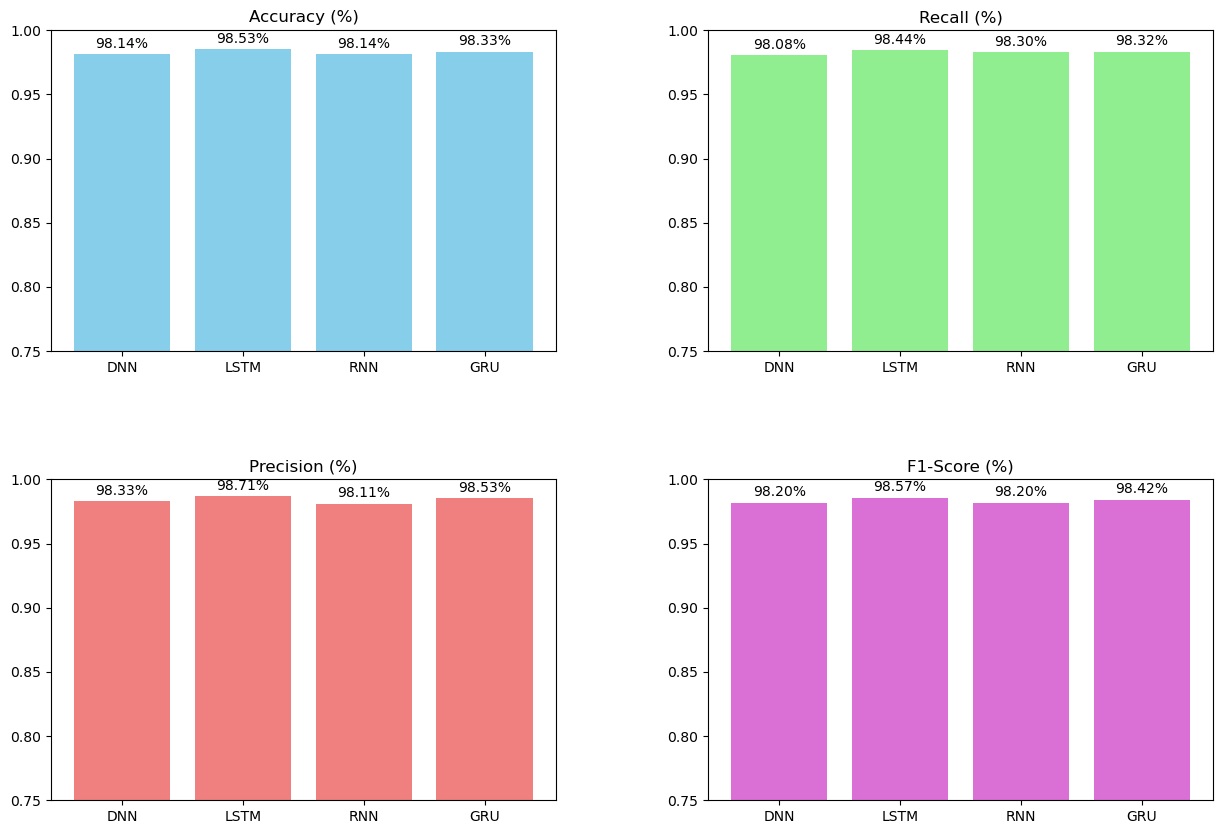

In [38]:
#grafico consolidado

import matplotlib.pyplot as plt

# Resultados apurados nas avaliações
models = ['DNN', 'LSTM', 'RNN', 'GRU']
accuracy = [accuracy_mlp, accuracy_lstm, accuracy_rnn, accuracy_gru]
recall = [recall_mlp, recall_lstm, recall_rnn, recall_gru]
precision = [precision_mlp, precision_lstm, precision_rnn, precision_gru]
f1 = [f1_mlp, f1_lstm, f1_rnn, f1_gru]

# Criar figura e eixos para um gráfico
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Ajustar o espaço entre os gráficos
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Gráfico de barras para Acurácia
ax[0, 0].bar(models, accuracy, color='skyblue')
ax[0, 0].set_title('Accuracy (%)')
ax[0, 0].set_ylim(0.75, 1)  # Definir limites do eixo y para uniformidade
for i, v in enumerate(accuracy):
    ax[0, 0].text(i, v + 0.005, "{:.2%}".format(v), ha='center')

# Gráfico de barras para Recall
ax[0, 1].bar(models, recall, color='lightgreen')
ax[0, 1].set_title('Recall (%)')
ax[0, 1].set_ylim(0.75, 1)
for i, v in enumerate(recall):
    ax[0, 1].text(i, v + 0.005, "{:.2%}".format(v), ha='center')

# Gráfico de barras para Precision
ax[1, 0].bar(models, precision, color='lightcoral')
ax[1, 0].set_title('Precision (%)')
ax[1, 0].set_ylim(0.75, 1)
for i, v in enumerate(precision):
    ax[1, 0].text(i, v + 0.005, "{:.2%}".format(v), ha='center')

# Gráfico de barras para F1-Score
ax[1, 1].bar(models, f1, color='orchid')
ax[1, 1].set_title('F1-Score (%)')
ax[1, 1].set_ylim(0.75, 1)
for i, v in enumerate(f1):
    ax[1, 1].text(i, v + 0.005, "{:.2%}".format(v), ha='center')

#Salvando gráfico (imagem)
plt.savefig('consolidadov2.png')

# Mostrar o gráfico consolidado
plt.show()


## Impact distribution

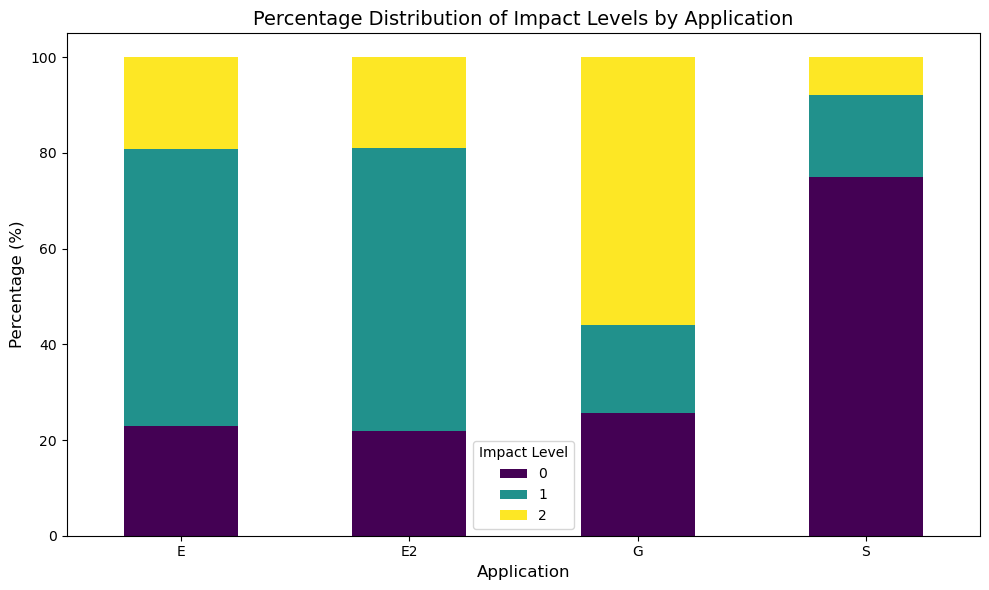

In [39]:
# Convertendo os dados one-hot encoded para uma coluna 'Application'
application_mapping = {
    'ohe__app_E': 'E',
    'ohe__app_E2': 'E2',
    'ohe__app_G': 'G',
    'ohe__app_S': 'S'
}
df_sim_ohe['Application'] = df_sim_ohe[[*application_mapping.keys()]].idxmax(axis=1).map(application_mapping)

# Contando as frequências de impacto por aplicação
impact_distribution = df_sim_ohe.groupby(['Application', 'impact_level']).size().unstack(fill_value=0)

# Calculando porcentagens
impact_distribution_percentage = impact_distribution.div(impact_distribution.sum(axis=1), axis=0) * 100

# Criando o gráfico
impact_distribution_percentage.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Percentage Distribution of Impact Levels by Application', fontsize=14)
plt.xlabel('Application', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Impact Level', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
